# ASSIGNMENT - Albertini, Lafronza, Ranieri

<div class="alert alert-block alert-info">
<b>
During this analysis there will be many cells marked with # containing pieces of code. Those are codes useful in order to test assuptions that were validated during the training and testing phase.
    </b>
    </div>

### References 

- https://github.com/lucabenedetto/2019-ai-for-security

- https://github.com/oreilly-mlsec/book-resources

- https://scikit-learn.org/stable/index.html

- Mark Carman's slides

- Chio, C. and Freeman, D. (2018). Machine Learning and Security. O'Reilly.

### Index
- 1. Intro
- 2. Transformation of data
- 3. Calculations
    - 3.1. Duration
    - 3.2. Packets
    - 3.3. Bytes
    - 3.4. Day and time
- 4. Creating different dataframes
    - 4.1. Numerical checks
    - 4.2. Plotting
- 5. Test dataset    
- 6. Preliminary operations on datasets before using classifiers
- 7. Dummy variables
- 8. Classifiers
    - 8.1. Logistic Regression
    - 8.2. GaussianNB
    - 8.3. Decision Tree
    - 8.4. Random Forest
- 9. Improving the classifiers
    - 9.1. Data preparation
         - 9.1.1. Scaling
         - 9.1.2. Converting labels into integers
         - 9.1.3. Cross validation with GridSearch
- 10. Neural network models (supervised) - Multi-layer Perceptron
- 11. Trying to predict attackType variable
    - 11.1. Decision Tree
    - 11.2. Random Forest
    - 11.3. Multi-layer Perceptron
- 12. Classifier Recap
    - 12.1. Regular Classifiers
    - 12.2. Classifiers with Binary Labels (searching for best parameters)
    - 12.3. Best performing classifiers
    - 12.4. Classifiers predicting attackType

## 1. Intro

As first step of this training we are going to import libraries that will be useful in order to accomplish our task. The second step will be importing the training dataset (week 1).

In [1]:
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt

In [2]:
# df = pd.read_csv('../NetworkTraffic/CIDDS-001-internal-week1_10pcSample.csv')

In [3]:
df = pd.read_csv('../ASSIGNMENT/data/NetworkTraffic/CIDDS-001-internal-week1_10pcSample.csv')

Some useful informations about the dataset are required in order to train the machine, so we are going to perform some actions in order to better desccribe the data. Especially, we wanted to have:
- A visualization of a sample of the dataset;
- A visualization of the name of the columns of the dataset;
- The number of rows in the dataset;
- Some general informations about the values contained into the columns and the presence/absence of null values.

In [4]:
df.sample(5)

,Unnamed: 0,Date first seen,Duration,Proto,Src IP Addr,Src Pt,Dst IP Addr,Dst Pt,Packets,Bytes,Flows,Flags,Tos,class,attackType,attackID,attackDescription
673927,6743430,2017-03-20 17:37:41.368,0.000,TCP,14402_114,80,192.168.220.14,39031.0,1,66,1,.A....,32,normal,---,---,---
792405,7926733,2017-03-21 15:05:07.462,0.006,TCP,192.168.220.16,42638,192.168.100.6,80.0,6,545,1,.AP.SF,0,attacker,dos,42,10000 connections on 192.168.100.6:80
190364,1907253,2017-03-16 10:32:28.143,0.389,TCP,192.168.220.9,36407,10527_2,443.0,10,2605,1,.AP...,0,normal,---,---,---
645478,6457504,2017-03-20 14:58:36.189,0.031,TCP,192.168.220.6,49878,10203_1,443.0,2,154,1,.AP...,0,normal,---,---,---
447896,4484405,2017-03-17 15:31:45.457,0.000,TCP,192.168.220.16,54565,10081_164,443.0,1,66,1,.A....,0,normal,---,---,---


In [5]:
print("df's columns: ",df.columns)
print('number of columns: ',len(df.columns))

df's columns:  Index(['Unnamed: 0', 'Date first seen', 'Duration', 'Proto', 'Src IP Addr',
       'Src Pt', 'Dst IP Addr', 'Dst Pt', 'Packets', 'Bytes', 'Flows', 'Flags',
       'Tos', 'class', 'attackType', 'attackID', 'attackDescription'],
      dtype='object')
number of columns:  17


In [6]:
print('total rows: ',len(df),'\n')
df.head(1)

total rows:  845152 



,Unnamed: 0,Date first seen,Duration,Proto,Src IP Addr,Src Pt,Dst IP Addr,Dst Pt,Packets,Bytes,Flows,Flags,Tos,class,attackType,attackID,attackDescription
0,23,2017-03-15 00:01:17.728,0.047,TCP,192.168.220.16,45586,10000_35,443.0,5,906,1,.AP.S.,0,normal,---,---,---


<b>NB. first row correspond to the header, first column is the df index, and the second column is the dataset index (first entry =! 1 because we are using a sample of the original dataset)<b/>

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 845152 entries, 0 to 845151
Data columns (total 17 columns):
Unnamed: 0           845152 non-null int64
Date first seen      845152 non-null object
Duration             845152 non-null float64
Proto                845152 non-null object
Src IP Addr          845152 non-null object
Src Pt               845152 non-null int64
Dst IP Addr          845152 non-null object
Dst Pt               845152 non-null float64
Packets              845152 non-null int64
Bytes                845152 non-null object
Flows                845152 non-null int64
Flags                845152 non-null object
Tos                  845152 non-null int64
class                845152 non-null object
attackType           845152 non-null object
attackID             845152 non-null object
attackDescription    845152 non-null object
dtypes: float64(2), int64(5), object(10)
memory usage: 109.6+ MB


Now we want to have a visualization of the unique values contained into the "class" attribute of the dataset. After, we want a visualization of the number of rows connected to each value of the considered attribute, this is useful because each row corresponds to a connection and this allows us to compare the number of malicious connections with the legitimate ones.

In [8]:
print(set(df['class']))
print(len(set(df['class'])))

{'attacker', 'victim', 'normal'}
3


In [9]:
df.groupby('class').size().reset_index().sort_values(0,ascending=False)

,class,0
1,normal,700513
0,attacker,75124
2,victim,69515


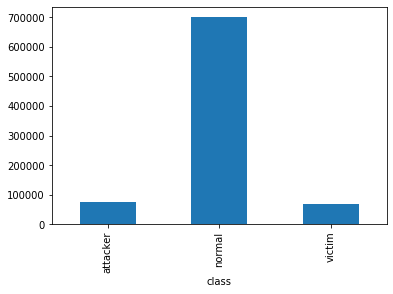

class
attacker     75124
normal      700513
victim       69515
dtype: int64

In [10]:
classes = df.groupby('class').size()
classes.plot(kind='bar',x='class')
plt.show()
classes

<b>NB. Column 0 correspond to the number of occurences so it correspond also to the number of rows for each class</b>

As it is shown in the previous cell, there are three types of connections:
- Attacker
- Normal
- Victim

The next step will be checking the list of attacks that the servers have received during the week checking the unique values of the "attackType" attribute. Then, we are going to visualize the number of malicious type of attack associated to each connection.

In [11]:
print(set(df['attackType']))
print(len(set(df['attackType'])))

{'portScan', 'dos', 'pingScan', 'bruteForce', '---'}
5


In [12]:
df.groupby('attackType').size().reset_index().sort_values('attackType')

,attackType,0
0,---,700513
1,bruteForce,168
2,dos,125430
3,pingScan,355
4,portScan,18686


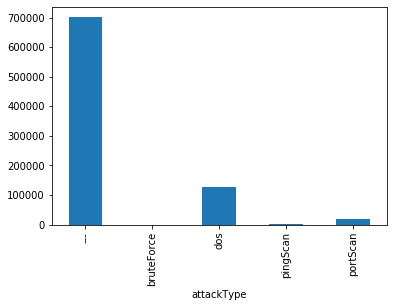

attackType
---           700513
bruteForce       168
dos           125430
pingScan         355
portScan       18686
dtype: int64

In [13]:
attack_types = df.groupby('attackType').size()
attack_types.plot(kind='bar',x='attackType')
plt.show()
attack_types

<b>NB. The row 0 has no value associated on the "attackType" column because it shows the normal (non malicious) connections. (you can check the occurences of "---" with the number of occurences of the "normal" class in the previous cells)</b>

The previous visualization only shows the number of malicious connection but those can be associated both to an attacker or to a victim. So, it is necessary to show the type of attack associated to the class of connection.

In [14]:
df.groupby(['class','attackType']).size().reset_index().sort_values('attackType',ascending=True)

,class,attackType,0
4,normal,---,700513
0,attacker,bruteForce,122
5,victim,bruteForce,46
1,attacker,dos,62871
6,victim,dos,62559
2,attacker,pingScan,253
7,victim,pingScan,102
3,attacker,portScan,11878
8,victim,portScan,6808


The highest number of malicious connection is associated to dos attacktype. The dos attack should be associated to a high number of connection coming from the same IP address. Visualizing together the columns "class", "attackType", "Src IP Addr" and "Dst IP Addr" we easily see if this is confirmed in the dataset.

In [15]:
df.groupby(['Src IP Addr','Dst IP Addr','class','attackType']).size().reset_index().sort_values(0,ascending=False).head(10)

,Src IP Addr,Dst IP Addr,class,attackType,0
59177,192.168.220.16,192.168.100.6,attacker,dos,62871
35032,192.168.100.6,192.168.220.16,victim,dos,62559
59753,192.168.220.16,DNS,normal,---,5222
71218,DNS,192.168.220.16,normal,---,5107
71211,DNS,192.168.210.5,normal,---,4658
44213,192.168.210.5,DNS,normal,---,4591
71220,DNS,192.168.220.4,normal,---,4553
62611,192.168.220.4,DNS,normal,---,4539
54138,192.168.220.14,DNS,normal,---,4271
71216,DNS,192.168.220.14,normal,---,4239


As is it shown in the visualization the connections associated to dos attack only come from the same IP address that, as it is stated in the Technical Report, are coming from an external IP address. It will be shown as the source of the attack if it is an attack connection, otherwise, if the connection comes from the victim it will be the destination of the conncetion.

Before, when we used df.info() method we have shown the different tyes of each column, that is important in order to understand if a column contains number or object but that, alone, is not very significant. We also have to check the values in the dataframe, in order to define  on which column we can perform directly some statistic and on which column we have to do transformations. An useful method to do this is to checking the number of unique values in each column in order to understand the variable type (numeric, binary or categorical).

In [16]:
print('number of different class in the dataframe: ', len(set(df['class'])))
print('number of different attackType in the dataframe: ', len(set(df['attackType'])))
print('number of different attackID in the dataframe: ', len(set(df['attackID'])))
print('number of different attackDescription in the dataframe: ', len(set(df['attackDescription'])))
print('number of different Proto in the dataframe: ', len(set(df['Proto'])))
print('number of different Flags in the dataframe: ', len(set(df['Flags'])))
print('number of different Flows in the dataframe: ', len(set(df['Flows'])))
print('number of different Type of Service in the dataframe: ',len(set(df['Tos'])),'\n')


columns = ['class','attackType','attackID','attackDescription','Proto','Flags','Flows','Tos']
for column in columns:
    print(column,':\n',set(df[column]),'\n')

number of different class in the dataframe:  3
number of different attackType in the dataframe:  5
number of different attackID in the dataframe:  43
number of different attackDescription in the dataframe:  11
number of different Proto in the dataframe:  4
number of different Flags in the dataframe:  20
number of different Flows in the dataframe:  1
number of different Type of Service in the dataframe:  5 

class :
 {'attacker', 'victim', 'normal'} 

attackType :
 {'portScan', 'dos', 'pingScan', 'bruteForce', '---'} 

attackID :
 {'18', '26', '37', '41', '---', '5', '25', '30', '20', '4', '6', '27', '14', '22', '29', '39', '11', '17', '13', '24', '23', '3', '1', '42', '32', '33', '9', '35', '10', '15', '2', '34', '28', '7', '19', '40', '8', '38', '12', '31', '16', '36', '21'} 

attackDescription :
 {'nmap args: -sS -T 2', '---', 'nmap args: -sS -T 1', '10000 connections on 192.168.100.6:80', 'nmap args: -sS -T 3', '192.168.200.4', 'nmap args: -n -sP -PE -T 3', '192.168.100.4', '192.168

<b> NB. The type of service (ToS) field is the second byte of the IPv4 header.
https://en.wikipedia.org/wiki/Type_of_service </b>

In [17]:
print('number of different Src IP Addr in the dataframe: ', len(set(df['Src IP Addr'])))
print('number of different Dst IP Addr in the dataframe: ',len(set(df['Dst IP Addr'])),'\n')

columns = ['Src IP Addr','Dst IP Addr']
for column in columns:
    print((df.groupby([column]).size().reset_index().sort_values(0,ascending=False).head(10)),'\n')

number of different Src IP Addr in the dataframe:  7386
number of different Dst IP Addr in the dataframe:  7970 

         Src IP Addr       0
7375  192.168.220.16  109811
7355   192.168.100.6   63276
7384             DNS   48991
7367   192.168.210.5   36890
7378   192.168.220.4   30374
7373  192.168.220.14   28826
7374  192.168.220.15   25590
7361   192.168.200.8   23820
7370  192.168.220.11   22413
7372  192.168.220.13   22154 

         Dst IP Addr       0
7957  192.168.220.16  103342
7523   192.168.100.6   63640
7968             DNS   49314
7902   192.168.210.5   38812
7961   192.168.220.4   29874
7955  192.168.220.14   28237
7956  192.168.220.15   25364
7717   192.168.200.8   24335
7952  192.168.220.11   21961
7954  192.168.220.13   21349 



<b>NB. The number of unique Source IP addresses is different than the number of Destination IP addresses because there are many connections in the dataframe and some can come from different IP addresses directed to only one and vice-versa</b>

In [18]:
print('number of different Src Pt in the dataframe: ', len(set(df['Src Pt'])))
print('number of different Dst Pt in the dataframe: ',len(set(df['Dst Pt'])),'\n')

columns = ['Src Pt','Dst Pt']
for column in columns:
    print((df.groupby([column]).size().reset_index().sort_values(0,ascending=False).head(10)),'\n')

number of different Src Pt in the dataframe:  33424
number of different Dst Pt in the dataframe:  33467 

      Src Pt       0
29        80  186934
78       443  149001
24        53   49050
80       445   14517
730     8082    5724
48       137    3455
715     8000    2589
49       138    2221
0          0    1104
6292   38148     842 

        Dst Pt       0
33        80.0  187466
83       443.0  150920
28        53.0   49343
85       445.0   14839
741     8082.0    5716
52       137.0    3455
726     8000.0    2515
53       138.0    2221
18302  50150.0     699
6302   38148.0     626 



<b>NB. The number of unique Source Port is different than the number of Destination port because there are many connections in the dataframe and some can come from different ports directed to only one and vice-versa</b>

In [19]:
print('number of different Packets in the dataframe: ', len(set(df['Packets'])))
print('number of different Bytes in the dataframe: ', len(set(df['Bytes'])))
print('number of different Duration in the dataframe: ',len(set(df['Duration'])),'\n')

columns = ['Packets', 'Bytes','Duration']
for column in columns:
    print((df.groupby([column]).size().reset_index().sort_values(0,ascending=False).head(10)),'\n')

number of different Packets in the dataframe:  1109
number of different Bytes in the dataframe:  23284
number of different Duration in the dataframe:  4756 

   Packets       0
0        1  379239
1        2  162256
2        3   74251
4        5   59589
3        4   54366
5        6   42356
6        7   12069
7        8    7968
9       10    6931
8        9    6816 

        Bytes       0
9          66  227535
1          54   36735
149       206   35406
422       479   35144
2          55   29491
215       272   28454
488       545   28105
51        108   27689
75        132   21530
117       174   15190 

    Duration       0
0      0.000  428068
3      0.003   36185
4      0.004   35426
2      0.002   28988
5      0.005   27410
1      0.001   17594
6      0.006   14318
7      0.007    5690
35     0.035    3845
36     0.036    3823 



In [20]:
print('number of different Unnamed: 0 in the dataframe: ',len(set(df['Unnamed: 0'])),'\n')

number of different Unnamed: 0 in the dataframe:  845152 



<b>NB. This column is the index of the dataframe (because we are working with a sample of the original dataset) that we are going to drop when we will have to train the algorithm</b>

In [21]:
print('number of different Date first seen in the dataframe: ',len(set(df['Date first seen'])),'\n')

columns = ['Date first seen']
for column in columns:
    print((df[column].head(10)),'\n')

number of different Date first seen in the dataframe:  813989 

0    2017-03-15 00:01:17.728
1    2017-03-15 00:01:18.457
2    2017-03-15 00:01:18.511
3    2017-03-15 00:01:22.400
4    2017-03-15 00:01:24.152
5    2017-03-15 00:01:26.075
6    2017-03-15 00:01:40.619
7    2017-03-15 00:01:42.380
8    2017-03-15 00:01:46.361
9    2017-03-15 00:02:03.175
Name: Date first seen, dtype: object 



## 2. Transformation of data

Not every column in the dataframe can be useful as it was stored, some of them require modification in order to be representative. The first one that requires this process is the "Date First Seen" column, that has to be modified in order to change his type from "object" to "datetime".

In [22]:
df['Date first seen'] = pd.to_datetime(df['Date first seen'])

In [23]:
df.dtypes

Unnamed: 0                    int64
Date first seen      datetime64[ns]
Duration                    float64
Proto                        object
Src IP Addr                  object
Src Pt                        int64
Dst IP Addr                  object
Dst Pt                      float64
Packets                       int64
Bytes                        object
Flows                         int64
Flags                        object
Tos                           int64
class                        object
attackType                   object
attackID                     object
attackDescription            object
dtype: object

As we can see now the type of the column has changed from object to datetime. Now, the next step will be creating two new columns, one that contains only the time of the connection and one that contains the day. In this way we can perform some analysis on these data.

In [24]:
# df['Date first seen']

In [25]:
df['day-of-week'] = df['Date first seen'].dt.dayofweek

In [26]:
# df.head()

In [27]:
df['time-of-day'] = df['Date first seen'].dt.hour

In [28]:
# df.head()

In [29]:
# df.info()

Here there is a sample of the "Date first seen" column and the two new columns that we have created.

In [30]:
df[['Date first seen','day-of-week','time-of-day']].sample(15)

,Date first seen,day-of-week,time-of-day
357895,2017-03-17 13:04:11.155,4,13
153921,2017-03-16 06:27:42.674,3,6
564151,2017-03-20 10:05:00.128,0,10
479289,2017-03-17 19:49:36.580,4,19
251254,2017-03-16 15:06:22.546,3,15
51619,2017-03-15 11:04:29.709,2,11
335371,2017-03-17 11:10:33.748,4,11
549404,2017-03-20 09:25:55.037,0,9
483990,2017-03-18 06:48:06.665,5,6
185263,2017-03-16 10:01:57.372,3,10


A further check could be inspecting the number of unique values. In fact, since they refere to days of the week and hours during the day, the first one should have maximum 7 unique values, the second one 24.

In [31]:
len(set(df['day-of-week']))

7

In [32]:
len(set(df['time-of-day']))

24

Another column that has to be modified in order to work with it is the column "bytes". In fact, this column contains both numbers and strings because to some values there is an "M" associated. This letter stands for Megabyte that is equal to 1.000.000 bytes (https://it.wikipedia.org/wiki/Megabyte). So, we have to remove this letter and multiply the related number by 1.000.000.

In [33]:
bytes_values = []
for value in df['Bytes'].astype('str').values:
    if value[-1] == 'M':
        new = value.replace('M','* 1000000')
        bytes_values.append(new)
    else:
        bytes_values.append(value)

Is it possible to verify with the following:

In [34]:
# print(len(bytes_values))
# print(len(df['Bytes']))

Now, we have created a new list, containing the old byte values if they were not modified and the multiplication where before there was the letter "M". The next step will be adding a new column in the dataframe that contains the values that now are stored in the list.

In [35]:
df['new_bytes'] = bytes_values

<b>NB. This has to be considered as an "intermediate" column. In fact the values that we have changed are not calculated and, where there was an "M", there is still the multiplication "* 1000000*", we decided to do this step because we want check if the trasformation is correct.  </b>

Here we are creating a new list where we have the bytes data calculated, so in their "final" form. Then, as we did before, we are going to store the list in a new column that we will add to the dataframe.

In [36]:
eval_bytes = []
for value in df['new_bytes'].values:
    new = eval(value)
    eval_bytes.append(new)

It is possible to verify, as we did before, using the following:

In [37]:
# print(len(eval_bytes))
# print(len(df['new_bytes']))

In [38]:
df['final_bytes'] = eval_bytes

To verify that the values of the columns correspond to each other we can easily take a sample of the three columns together and check if the values are the same.

In [39]:
df.groupby(['Bytes','new_bytes','final_bytes']).size().reset_index().tail(5)

,Bytes,new_bytes,final_bytes,0
23279,377.1 M,377.1 * 1000000,377100000.0,1
23280,458.2 M,458.2 * 1000000,458200000.0,1
23281,473.9 M,473.9 * 1000000,473900000.0,1
23282,480.1 M,480.1 * 1000000,480100000.0,1
23283,499.9 M,499.9 * 1000000,499900000.0,1


In [40]:
df.groupby(['Bytes','new_bytes','final_bytes']).size().reset_index().sample(5)

,Bytes,new_bytes,final_bytes,0
12788,19308,19308,19308.0,1
4792,4863,4863,4863.0,5
3268,3326,3326,3326.0,8
9419,10641,10641,10641.0,1
12618,18696,18696,18696.0,1


Here there are some test to check how the dataframe looks like after the new columns were added.

In [41]:
# df.head()

In [42]:
# df.info()

## 3. Calculations

The next step, after we added some useful columns to the dataframe, will be computing some simple statistic on the numerical values that we have. The first thing that we want to do is to check which are the columns that contain only numbers (integers and float).

In [43]:
df.select_dtypes(include=['int64','float64']).sample(10)

,Unnamed: 0,Duration,Src Pt,Dst Pt,Packets,Flows,Tos,day-of-week,time-of-day,final_bytes
324770,3255482,0.000,52384,80.0,1,1,0,4,10,54.0
374880,3753687,0.002,80,54505.0,4,1,0,4,13,272.0
207555,2080093,0.000,443,58798.0,1,1,32,3,12,54.0
712866,7132801,0.026,40850,443.0,5,1,0,1,9,453.0
575302,5757891,0.004,49973,80.0,2,1,0,0,10,140.0
424277,4246253,0.005,51952,80.0,6,1,0,4,14,545.0
460429,4609544,0.041,443,40593.0,7,1,0,4,16,12733.0
743194,7437010,0.123,443,43653.0,2,1,32,1,11,294.0
210973,2114441,0.000,52922,443.0,1,1,0,3,12,55.0
712126,7125544,0.000,80,43320.0,1,1,32,1,9,78.0


<b>NB. Unnamed (the index of the dataframe), Src Pt (Source Port), Dst Prt (Destination Port), Tos (Type of Service) and Flows must not be considered as numerical variables even if they are integer/floats.</b>

The only numerical variables are these, and here there is a sample of them:

In [44]:
print(df['Duration'].sample(5))
print('\n',df['final_bytes'].sample(5))
print('\n',df['Packets'].sample(5))

171940    0.000
776014    0.000
60472     0.000
235888    0.000
214361    0.005
Name: Duration, dtype: float64

 477537    4638.0
752195    4407.0
577519      66.0
743947      66.0
354564      66.0
Name: final_bytes, dtype: float64

 97464     2
835077    1
730891    1
493790    1
807967    2
Name: Packets, dtype: int64


### 3.1. Duration

The first numeric variable that we are going to analyze is "Duration". It represents the duration of each flow. The first thing that we are going to do is use .describe() in order to compute some simple statistics on the data. Then we are going to use matplotlib library to create a boxplot graph to show the distribution of the values.

In [45]:
df['Duration'].describe()

count    845152.000000
mean          0.113840
std           0.760426
min           0.000000
25%           0.000000
50%           0.000000
75%           0.025000
max         135.403000
Name: Duration, dtype: float64

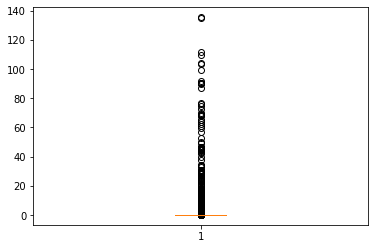

In [46]:
plt.boxplot(df['Duration'])
plt.show()

Another type of graph that could be used is the histogram, in particular, we can create two different plots, one representing the duration frequency during all the connections of the dataframe and another representing the duration only for the connections classified as "attack".

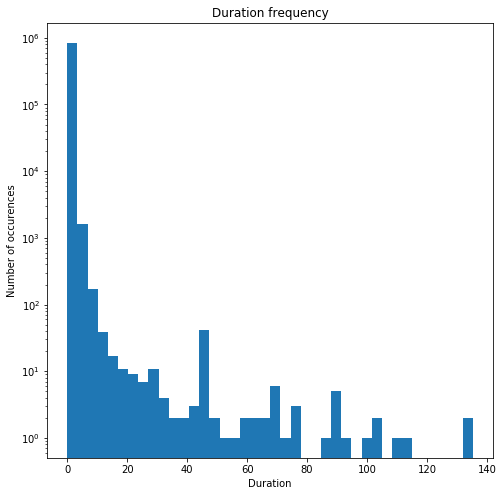

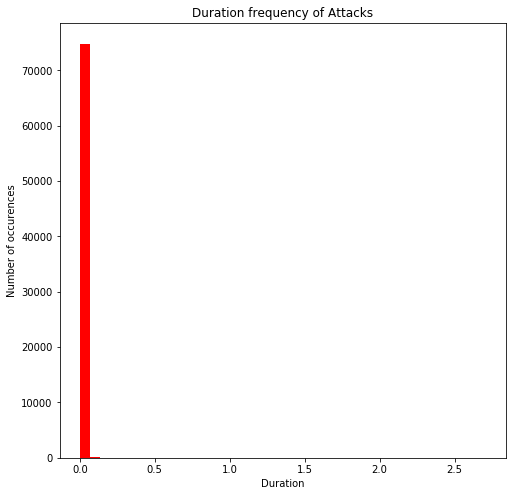

In [47]:
fig, ax = plt.subplots(figsize=(8,8))

ax.hist(df['Duration'].values, bins = 40)
ax.set_yscale('log')
ax.set_title('Duration frequency')
ax.set_xlabel('Duration')
ax.set_ylabel('Number of occurences')

plt.show()

fig, ax = plt.subplots(figsize=(8,8))

ax.hist(df[df['class']=='attacker'][['Duration']].values, bins = 40, color='red')
ax.set_title('Duration frequency of Attacks')
ax.set_xlabel('Duration')
ax.set_ylabel('Number of occurences')

plt.show()

In [48]:
# df['Duration'].plot.hist(bins=50)

### 3.2. Packets

We are going to do the same calculations and plots that we used for "Duration" with the column "Packets" that represents the number of transmitted packets during a single connection.

In [49]:
df['Packets'].describe()

count    845152.000000
mean         14.902497
std         978.309853
min           1.000000
25%           1.000000
50%           2.000000
75%           4.000000
max      195912.000000
Name: Packets, dtype: float64

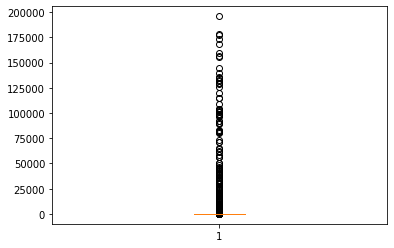

In [50]:
plt.boxplot(df['Packets'])
plt.show()

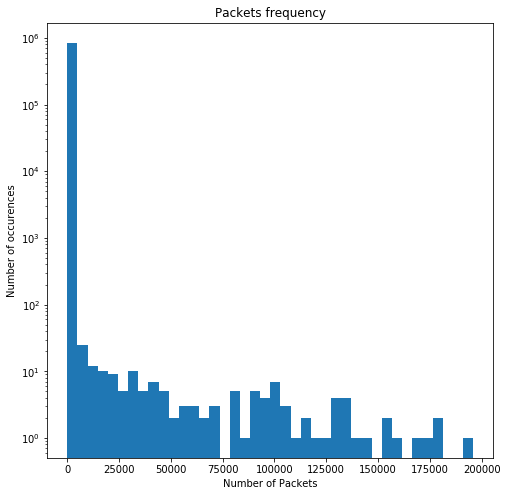

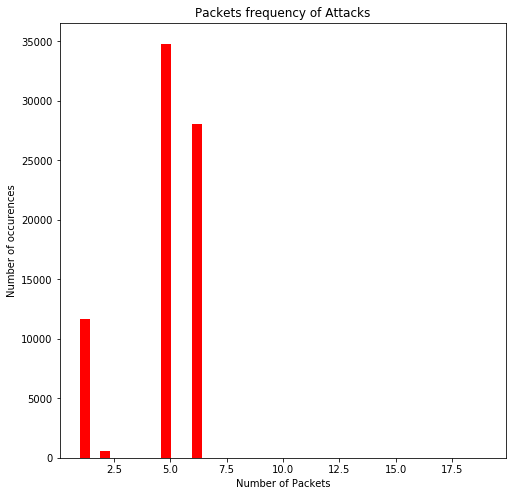

In [51]:
fig, ax = plt.subplots(figsize=(8,8))

ax.hist(df['Packets'].values, bins = 40)
ax.set_yscale('log')
ax.set_title('Packets frequency')
ax.set_xlabel('Number of Packets')
ax.set_ylabel('Number of occurences')

plt.show()

fig, ax = plt.subplots(figsize=(8,8))

ax.hist(df[df['class']=='attacker'][['Packets']].values, bins = 40, color='red')
ax.set_title('Packets frequency of Attacks')
ax.set_xlabel('Number of Packets')
ax.set_ylabel('Number of occurences')

plt.show()

In [52]:
# df['Packets'].plot.hist(bins=50)

### 3.3. Bytes

We are going to do calculations and the plotting of the "final_bytes" column, representing the number of transmitted bytes during each connection.

In [53]:
df['final_bytes'].describe()

count    8.451520e+05
mean     1.840946e+04
std      1.990350e+06
min      4.200000e+01
25%      6.600000e+01
50%      1.520000e+02
75%      4.790000e+02
max      4.999000e+08
Name: final_bytes, dtype: float64

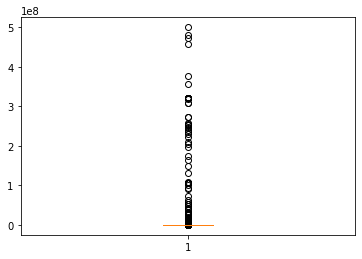

In [54]:
plt.boxplot(df['final_bytes'])
plt.show()

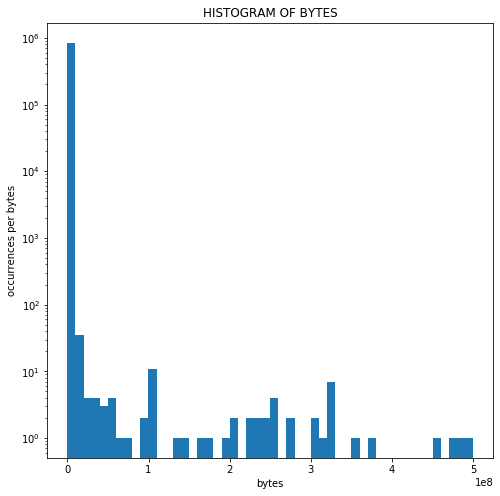

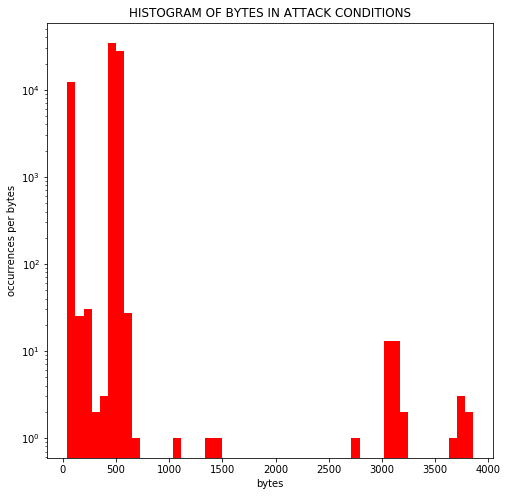

In [55]:
fig, ax = plt.subplots(figsize=(8,8))

ax.hist(df['final_bytes'], bins = 50)
ax.set_xlabel('bytes')
ax.set_ylabel('occurrences per bytes')
ax.set_title('HISTOGRAM OF BYTES')
ax.set_yscale('log')

plt.show()

fig, ax = plt.subplots(figsize=(8,8))

ax.hist(df[df['class']=='attacker'][['final_bytes']].values, bins = 50, color='red')
ax.set_xlabel('bytes')
ax.set_ylabel('occurrences per bytes')
ax.set_title('HISTOGRAM OF BYTES IN ATTACK CONDITIONS')
ax.set_yscale('log')

plt.show()

### 3.4. Day and Time

Performing calculations on these column will not be very useful, so we decided to perform some more plotting in order to receive some more interesting information about the attacks.
The following plot shows the connections for every day of the week. As we can easily see the connections during the weekend are considerably less than the ones during the weekdays.

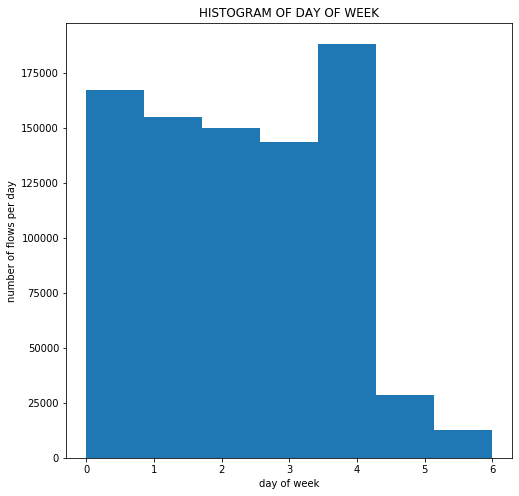

In [56]:
fig, ax = plt.subplots(figsize=(8,8))

ax.hist(df['day-of-week'], bins = 7)
ax.set_xlabel('day of week')
ax.set_ylabel('number of flows per day')
ax.set_title('HISTOGRAM OF DAY OF WEEK')

plt.show()

If we consider only the connections that are classified as "attacker" we can have plot showing the distribution of the malicious connections during the days. With the next line we are going to show a sample of the data we are going to use for the next plot, that will consist of only three columns, representing the class, the day of week and the time of day. The class will be restricted only to attacker.

In [57]:
df[df['class']=='attacker'][['class','day-of-week','time-of-day']].sample(10)

,class,day-of-week,time-of-day
75996,attacker,2,13
760738,attacker,1,13
359253,attacker,4,13
607723,attacker,0,12
608753,attacker,0,12
362122,attacker,4,13
473007,attacker,4,17
420468,attacker,4,14
371787,attacker,4,13
236269,attacker,3,14


Is it also possible to check if there are some days without any attack.

In [58]:
set(df[df['class']=='attacker'][['class','day-of-week','time-of-day']]['day-of-week'])

{0, 1, 2, 3, 4}

As we can see, attacks occurs only during weekdays (0 to 4), the days with an higher number of connections.

It is also useful to show different plots, one containing only the malicious connections, one containing the connections of the victims and one containing only the normal ones.

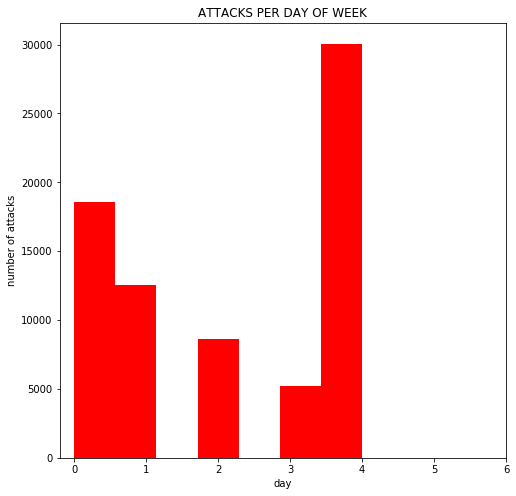

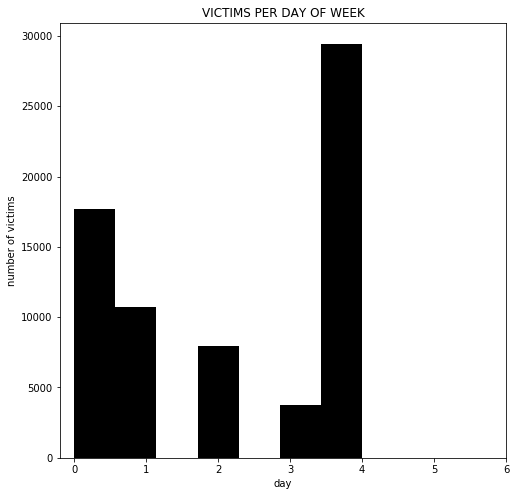

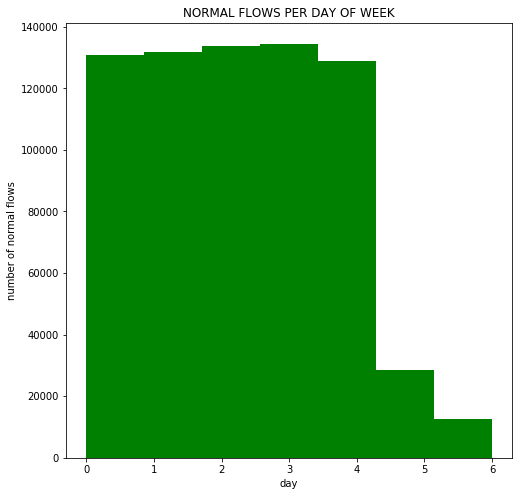

In [59]:
fig, ax = plt.subplots(figsize=(8,8))

ax.hist(df[df['class']=='attacker'][['day-of-week']].values, bins = 7, color='red')
ax.set_xlabel('day')
ax.set_xticks(df['day-of-week'].unique())
ax.set_ylabel('number of attacks')
ax.set_title('ATTACKS PER DAY OF WEEK')

plt.show()


fig, ax = plt.subplots(figsize=(8,8))

ax.hist(df[df['class']=='victim'][['day-of-week']].values, bins = 7, color='black')
ax.set_xlabel('day')
ax.set_xticks(df['day-of-week'].unique())
ax.set_ylabel('number of victims')
ax.set_title('VICTIMS PER DAY OF WEEK')

plt.show()


fig, ax = plt.subplots(figsize=(8,8))

ax.hist(df[df['class']=='normal'][['day-of-week']].values, bins = 7, color='green')
ax.set_xlabel('day')
ax.set_xticks(df['day-of-week'].unique())
ax.set_ylabel('number of normal flows')
ax.set_title('NORMAL FLOWS PER DAY OF WEEK')

plt.show()



After this representation we can confirm that friday is the day with the highest number of attacks, and it is also the day with the highest number of total connections.

We can also create a variable that contains the three columns showed above and then group them together to see which are combination of day and hour with the highest number of attack connections.

In [60]:
a = df[df['class']=='attacker'][['class','day-of-week','time-of-day']]

In [61]:
a.groupby(['class','day-of-week','time-of-day']).size().reset_index().sort_values(0,ascending=False).head(10)

,class,day-of-week,time-of-day,0
76,attacker,4,14,14843
75,attacker,4,13,13600
30,attacker,1,15,9317
3,attacker,0,12,8482
44,attacker,2,13,5496
0,attacker,0,9,4082
1,attacker,0,10,3785
45,attacker,2,14,2178
28,attacker,1,13,2045
2,attacker,0,11,1872


After this calculation we can state that attackers generally work more during lunchtime.

## 4. Creating different dataframes

In this section we are creating different dataframe, using the column "class" as discriminating. The dataframe will be called "df_attack" and it contains only the connections that can be classified as "attacker". Then we can check some differences between the original dataframe and the one we have created.

In [62]:
df_attack = df[df['class']=='attacker']
# df_attack.sample(5)

### 4.1. Numerical checks

We can do this with different variables such as:

1. Bytes

In [63]:
len(set(df['Bytes']))

23284

In [64]:
len(set(df_attack['Bytes']))

41

2. Protocols

In [65]:
len(set(df['Proto']))

4

In [66]:
set(df['Proto'])

{'ICMP ', 'IGMP ', 'TCP  ', 'UDP  '}

In [67]:
len(set(df_attack['Proto']))

3

In [68]:
set(df_attack['Proto'])

{'ICMP ', 'TCP  ', 'UDP  '}

3. Type of Service

In [69]:
len(set(df['Tos']))

5

In [70]:
set(df['Tos'])

{0, 12, 16, 32, 192}

In [71]:
len(set(df_attack['Tos']))

1

In [72]:
set(df_attack['Tos'])

{0}

4. Source and Destination Ports

In [73]:
len(set(df['Src Pt']))

33424

In [74]:
len(set(df_attack['Src Pt']))

25226

In [75]:
len(set(df['Dst Pt']))

33467

In [76]:
len(set(df_attack['Dst Pt']))

1003

5. Flags

In [77]:
len(set(df['Flags']))

20

In [78]:
len(set(df_attack['Flags']))

10

6. Packets

In [79]:
len(set(df['Packets']))

1109

In [80]:
len(set(df_attack['Packets']))

15

In [81]:
set(df_attack['Packets'])

{1, 2, 3, 4, 5, 6, 7, 11, 12, 13, 15, 16, 17, 18, 19}

7. Source and Destination IP Addresses

attack

In [82]:
df_attack.groupby('Src IP Addr').size().reset_index().sort_values(0,ascending=False)

,Src IP Addr,0
0,192.168.220.16,75124


original dataframe (with all the classes, we can see that more than an half of connections with the first Src IP Addr were attacks 

In [83]:
df.groupby('Src IP Addr').size().reset_index().sort_values(0,ascending=False).head(10)

,Src IP Addr,0
7375,192.168.220.16,109811
7355,192.168.100.6,63276
7384,DNS,48991
7367,192.168.210.5,36890
7378,192.168.220.4,30374
7373,192.168.220.14,28826
7374,192.168.220.15,25590
7361,192.168.200.8,23820
7370,192.168.220.11,22413
7372,192.168.220.13,22154


!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

In [84]:
df_attack.groupby('Dst IP Addr').size().reset_index().sort_values(0,ascending=False).head(10)

,Dst IP Addr,0
139,192.168.100.6,63319
518,192.168.210.5,1898
510,192.168.210.4,1726
348,192.168.210.1,820
439,192.168.210.2,770
333,192.168.200.8,708
499,192.168.210.3,708
342,192.168.200.9,445
566,192.168.220.1,388
122,192.168.100.4,385


Type of Service

In [85]:
df_attack.groupby('Tos').size().reset_index().sort_values(0,ascending=False)

,Tos,0
0,0,75124


In [86]:
df.groupby('Tos').size().reset_index().sort_values(0,ascending=False)

,Tos,0
0,0,607545
3,32,237131
4,192,386
2,16,89
1,12,1


### 4.2. Plotting

Now we are going to use plots in order to underline the difference between the attack dataframe with the ones compesed respectively only of victim and normal connections. As first things we have to define the two new dataframes.

In [87]:
df_victim = df[df['class']=='victim']

In [88]:
df_normal = df[df['class']=='normal']

Here there are some plotting on different variables:

1. Type of Service

In [89]:
# check values for the plot

#print('normal \n',df_normal.groupby('Tos').size(),'\n')
#print('attack \n',df_attack.groupby('Tos').size(),'\n')
#print('victim \n',df_victim.groupby('Tos').size(),'\n')

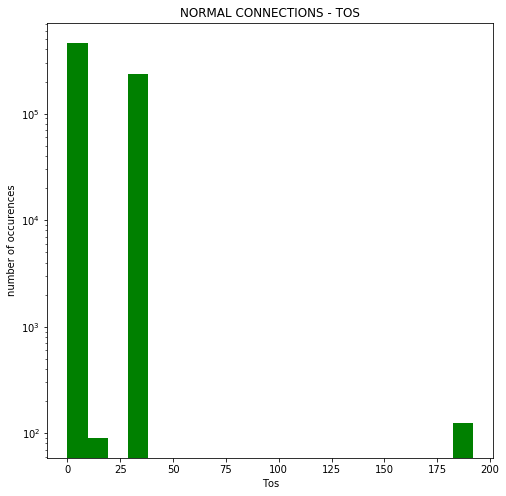

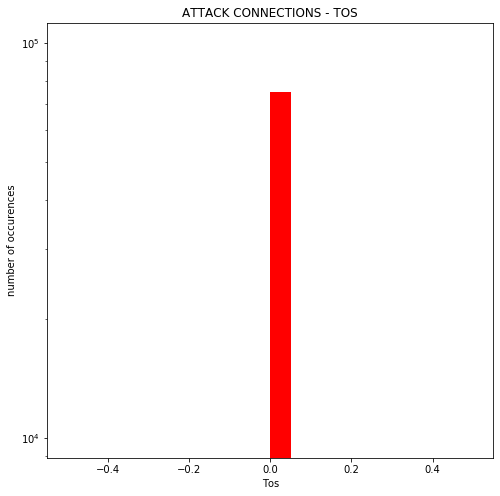

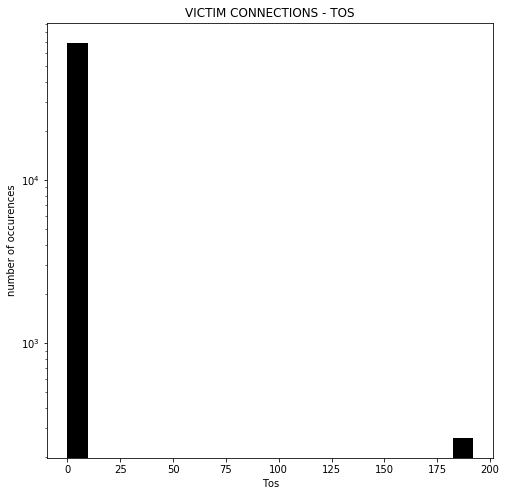

In [90]:
fig, ax = plt.subplots(figsize=(8,8))

ax.hist(df_normal['Tos'].values, bins = 20, color='green')
ax.set_xlabel('Tos')
ax.set_ylabel('number of occurences')
ax.set_title('NORMAL CONNECTIONS - TOS')
ax.set_yscale('log')

plt.show()

fig, ax = plt.subplots(figsize=(8,8))

ax.hist(df_attack['Tos'].values, bins = 20, color='red')
ax.set_xlabel('Tos')
ax.set_ylabel('number of occurences')
ax.set_title('ATTACK CONNECTIONS - TOS')
ax.set_yscale('log')

plt.show()

fig, ax = plt.subplots(figsize=(8,8))

ax.hist(df_victim['Tos'].values, bins = 20, color='black')
ax.set_xlabel('Tos')
ax.set_ylabel('number of occurences')
ax.set_title('VICTIM CONNECTIONS - TOS')
ax.set_yscale('log')

plt.show()

2. Protocols

In [91]:
# check values for the plot

# print('normal \n',df_normal.groupby('Proto').size(),'\n')
# print('attack \n',df_attack.groupby('Proto').size(),'\n')
# print('victim \n',df_victim.groupby('Proto').size(),'\n')

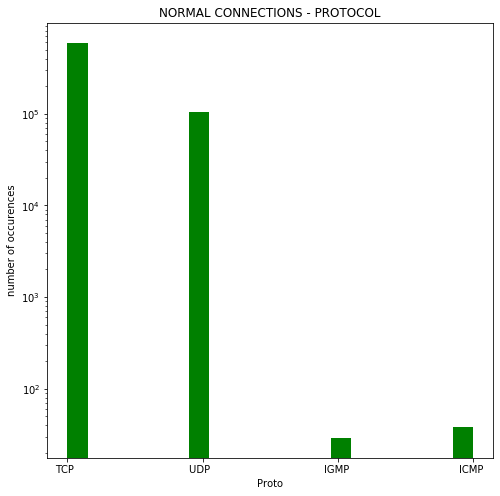

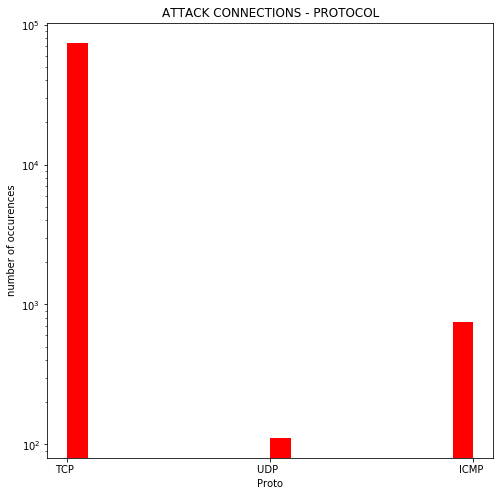

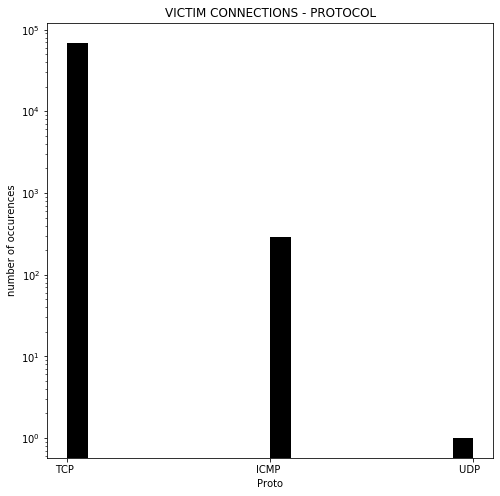

In [92]:
fig, ax = plt.subplots(figsize=(8,8))

ax.hist(df_normal['Proto'].values, bins = 20, color='green')
ax.set_xlabel('Proto')
ax.set_ylabel('number of occurences')
ax.set_title('NORMAL CONNECTIONS - PROTOCOL')
ax.set_yscale('log')

plt.show()

fig, ax = plt.subplots(figsize=(8,8))

ax.hist(df_attack['Proto'].values, bins = 20, color='red')
ax.set_xlabel('Proto')
ax.set_ylabel('number of occurences')
ax.set_title('ATTACK CONNECTIONS - PROTOCOL')
ax.set_yscale('log')

plt.show()

fig, ax = plt.subplots(figsize=(8,8))

ax.hist(df_victim['Proto'].values, bins = 20, color='black')
ax.set_xlabel('Proto')
ax.set_ylabel('number of occurences')
ax.set_title('VICTIM CONNECTIONS - PROTOCOL')
ax.set_yscale('log')

plt.show()

3. Flags

In [93]:
# check values for the plot

# print('normal \n',df_normal.groupby('Flags').size(),'\n')
# print('attack \n',df_attack.groupby('Flags').size(),'\n')
# print('victim \n',df_victim.groupby('Flags').size(),'\n')

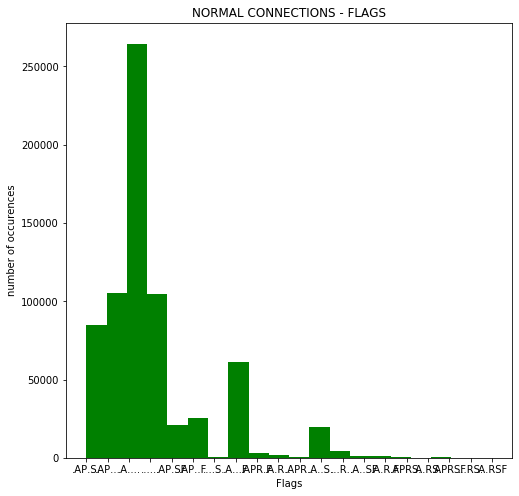

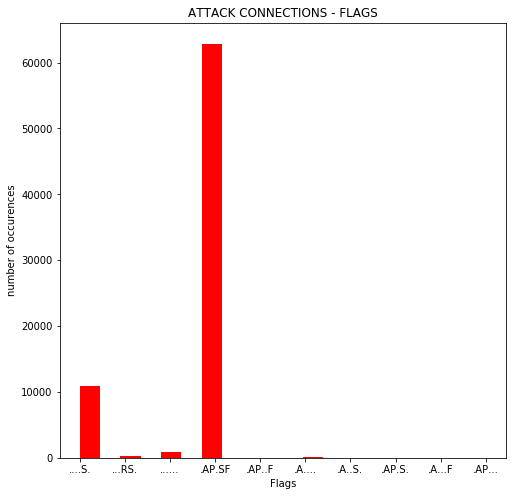

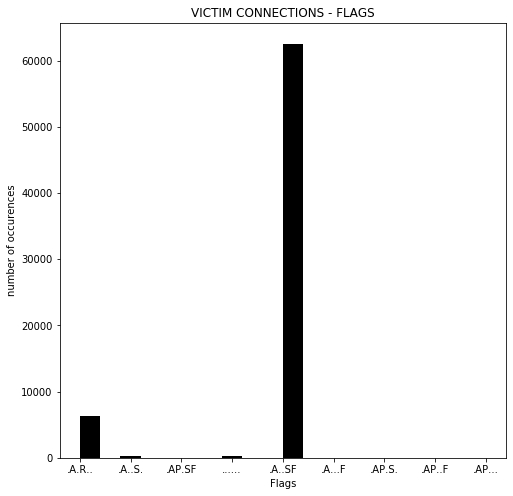

In [94]:
fig, ax = plt.subplots(figsize=(8,8))

ax.hist(df_normal['Flags'].values, bins = 20, color='green')
ax.set_xlabel('Flags')
ax.set_ylabel('number of occurences')
ax.set_title('NORMAL CONNECTIONS - FLAGS')
#ax.set_yscale('log')

plt.show()

fig, ax = plt.subplots(figsize=(8,8))

ax.hist(df_attack['Flags'].values, bins = 20, color='red')
ax.set_xlabel('Flags')
ax.set_ylabel('number of occurences')
ax.set_title('ATTACK CONNECTIONS - FLAGS')
#ax.set_yscale('log')

plt.show()

fig, ax = plt.subplots(figsize=(8,8))

ax.hist(df_victim['Flags'].values, bins = 20, color='black')
ax.set_xlabel('Flags')
ax.set_ylabel('number of occurences')
ax.set_title('VICTIM CONNECTIONS - FLAGS')
#ax.set_yscale('log')

plt.show()

4. Packets

In [95]:
# check values for the plot

# print('normal \n',df_normal.groupby('Packets').size(),'\n')
# print('attack \n',df_attack.groupby('Packets').size(),'\n')
# print('victim \n',df_victim.groupby('Packets').size(),'\n')

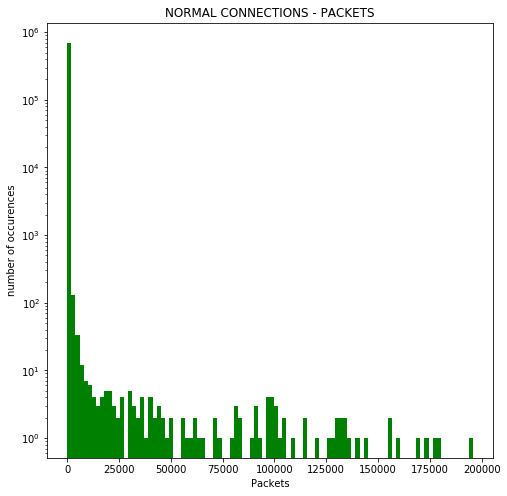

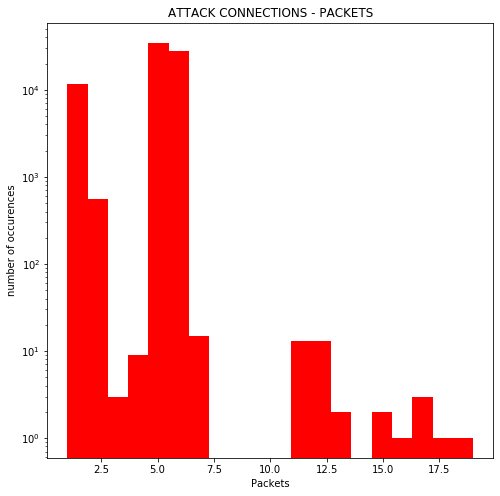

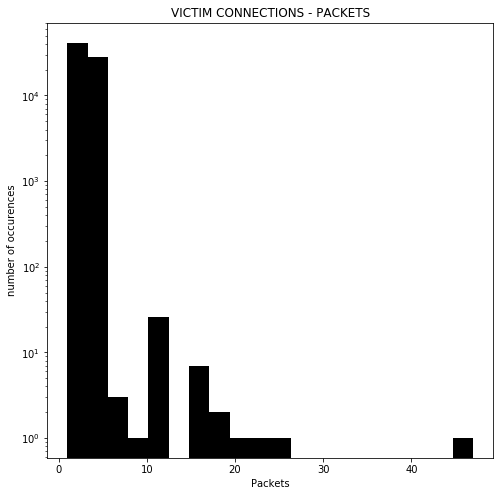

In [96]:
fig, ax = plt.subplots(figsize=(8,8))

ax.hist(df_normal['Packets'].values, bins = 100, color='green')
ax.set_xlabel('Packets')
ax.set_ylabel('number of occurences')
ax.set_title('NORMAL CONNECTIONS - PACKETS')
ax.set_yscale('log')

plt.show()

fig, ax = plt.subplots(figsize=(8,8))

ax.hist(df_attack['Packets'].values, bins = 20, color='red')
ax.set_xlabel('Packets')
ax.set_ylabel('number of occurences')
ax.set_title('ATTACK CONNECTIONS - PACKETS')
ax.set_yscale('log')

plt.show()

fig, ax = plt.subplots(figsize=(8,8))

ax.hist(df_victim['Packets'].values, bins = 20, color='black')
ax.set_xlabel('Packets')
ax.set_ylabel('number of occurences')
ax.set_title('VICTIM CONNECTIONS - PACKETS')
ax.set_yscale('log')

plt.show()

5. Bytes

In [97]:
# check
# print(len(set(df_normal['final_bytes'])))
# print(len(set(df_attack['final_bytes'])))
# print(len(set(df_victim['final_bytes'])))

In [98]:
# check
# print('normal \n',df_normal.groupby('final_bytes').size(),'\n')
# print('attack \n',df_attack.groupby('final_bytes').size(),'\n')
# print('victim \n',df_victim.groupby('final_bytes').size(),'\n')

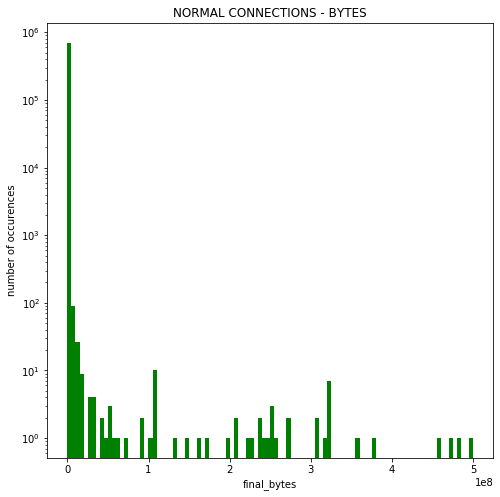

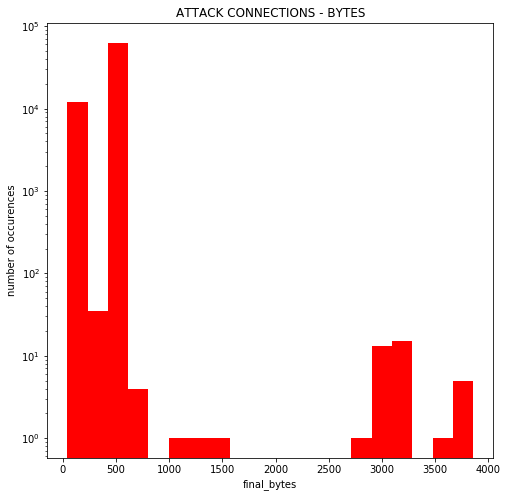

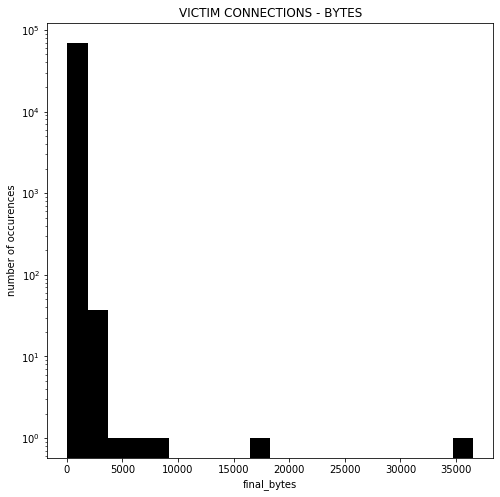

In [99]:
fig, ax = plt.subplots(figsize=(8,8))

ax.hist(df_normal['final_bytes'].values, bins = 100, color='green')
ax.set_xlabel('final_bytes')
ax.set_ylabel('number of occurences')
ax.set_title('NORMAL CONNECTIONS - BYTES')
ax.set_yscale('log')

plt.show()

fig, ax = plt.subplots(figsize=(8,8))

ax.hist(df_attack['final_bytes'].values, bins = 20, color='red')
ax.set_xlabel('final_bytes')
ax.set_ylabel('number of occurences')
ax.set_title('ATTACK CONNECTIONS - BYTES')
ax.set_yscale('log')

plt.show()

fig, ax = plt.subplots(figsize=(8,8))

ax.hist(df_victim['final_bytes'].values, bins = 20, color='black')
ax.set_xlabel('final_bytes')
ax.set_ylabel('number of occurences')
ax.set_title('VICTIM CONNECTIONS - BYTES')
ax.set_yscale('log')

plt.show()

## 5. Test Dataset

Now we have to import the second dataset, the one we are going to use to test our algorithm. We are going to call it "test_dataset".

In [100]:
test_dataset = pd.read_csv('../ASSIGNMENT/data/NetworkTraffic/CIDDS-001-internal-week2_10pcSample.csv')

C:\Users\Utente\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3051: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


The problem is that this dataset will be different than the first one, so we need to perform some transformation in order to make it look like the train dataset. We are not going to fully specify the changes we are going to do in the next rows as we did for the first one because the calculations are the same. Neverthless, there will be some check rows to verify the correctness of the computations.

1. Samples and info

In [101]:
test_dataset.sample(5)

,Unnamed: 0,Date first seen,Duration,Proto,Src IP Addr,Src Pt,Dst IP Addr,Dst Pt,Packets,Bytes,Flows,Flags,Tos,class,attackType,attackID,attackDescription
495508,4958822,2017-03-24 13:08:39.013,0.003,TCP,192.168.220.15,55485,192.168.100.6,80.0,5,479,1,.AP.SF,0,attacker,dos,53,10000 connections on 192.168.100.6:80
477928,4783455,2017-03-24 13:06:17.222,0.002,TCP,192.168.100.6,80,192.168.220.15,49991.0,3,206,1,.A..SF,0,victim,dos,53,10000 connections on 192.168.100.6:80
784654,7849758,2017-03-27 11:28:52.341,0.000,TCP,192.168.220.9,59861,10081_164,80.0,1,66,1,.A....,0,normal,---,---,---
96219,958602,2017-03-22 16:17:44.457,0.014,TCP,192.168.220.15,48187,15210_78,80.0,2,140,1,.A..S.,0,normal,---,---,---
542364,5427117,2017-03-24 13:41:07.989,0.000,TCP,192.168.220.15,33158,10873_131,80.0,1,66,1,.A...F,0,normal,---,---,---


In [102]:
test_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1031073 entries, 0 to 1031072
Data columns (total 17 columns):
Unnamed: 0           1031073 non-null int64
Date first seen      1031073 non-null object
Duration             1031073 non-null float64
Proto                1031073 non-null object
Src IP Addr          1031073 non-null object
Src Pt               1031073 non-null int64
Dst IP Addr          1031073 non-null object
Dst Pt               1031073 non-null float64
Packets              1031073 non-null int64
Bytes                1031073 non-null object
Flows                1031073 non-null int64
Flags                1031073 non-null object
Tos                  1031073 non-null int64
class                1031073 non-null object
attackType           1031073 non-null object
attackID             1031073 non-null object
attackDescription    1031073 non-null object
dtypes: float64(2), int64(5), object(10)
memory usage: 133.7+ MB


2. Date and Time

In [103]:
test_dataset['Date first seen'] = pd.to_datetime(test_dataset['Date first seen'])

In [104]:
test_dataset['day-of-week'] = test_dataset['Date first seen'].dt.dayofweek

In [105]:
test_dataset['time-of-day'] = test_dataset['Date first seen'].dt.hour

In [106]:
#test_dataset.info()

In [107]:
#len(set(test_dataset['day-of-week']))

In [108]:
#len(set(test_dataset['time-of-day']))

3. Bytes

In [109]:
bytes_test_values = []
for value in test_dataset['Bytes'].astype('str').values:
    if value[-1] == 'M':
        new = value.replace('M','* 1000000')
        bytes_test_values.append(new)
    else:
        bytes_test_values.append(value)

In [110]:
#print(len(bytes_test_values))
#print(len(test_dataset['Bytes']))

In [111]:
test_dataset['new_bytes'] = bytes_test_values

In [112]:
eval_test_bytes = []
for value in test_dataset['new_bytes'].values:
    new = eval(value)
    eval_test_bytes.append(new)

In [113]:
#print(len(eval_test_bytes))
#print(len(test_dataset['new_bytes']))

In [114]:
test_dataset['final_bytes'] = eval_test_bytes

In [115]:
test_dataset.groupby(['Bytes','new_bytes','final_bytes']).size().reset_index().tail()

,Bytes,new_bytes,final_bytes,0
26471,449.0 M,449.0 * 1000000,449000000.0,1
26472,455.9 M,455.9 * 1000000,455900000.0,1
26473,471.5 M,471.5 * 1000000,471500000.0,1
26474,474.1 M,474.1 * 1000000,474100000.0,1
26475,483.9 M,483.9 * 1000000,483900000.0,1


## 6. Preliminary operations on datasets before using classifiers

Now we are going to check the differences between the two datasets in order to understand wich variable we can transform into a dummy variable and which ones we can transform into numeric variable.

In [116]:
print(len(df))
print(len(test_dataset))      

845152
1031073


In [117]:
# for column in df.columns:
#     print(column,':\n')
#     print(len(set(df[column])))
#     print(len(set(test_dataset[column])),'\n')

In [118]:
# different relevant (relevant cause we cant dummy them) unique values:
# attackDescription - attackID - Tos

We are going to create two new datasets (one corresponding to the train one and one to the test one) in which we have dropped columns that are completely useless.

In [119]:
df_drop_col = df.drop(['Unnamed: 0','Bytes','new_bytes','Flows'],axis=1)
test_dataset_drop_col = test_dataset.drop(['Unnamed: 0','Bytes','new_bytes','Flows'],axis=1)

Some tests:

In [120]:
# print(len(df_drop_col))
# print(len(test_dataset_drop_col))
# print(len(df_drop_col.columns))
# print(len(test_dataset_drop_col.columns))

We are also going to create different categories for for the Source and Destination IP addresses of each dataframe. This will be useful in order to transform the categories into dummy variables. As usual we are first creating a list containing the new variables, then we create a new column into the dataframe containing that list. Here there is the execution:

1. Train Source

In [121]:
src_ip_category = []

for ip_addr in df_drop_col['Src IP Addr']:
    if ip_addr == 'DNS':
        #return 'DNS'
        src_ip_category.append('DNS')
    elif ip_addr == 'EXT_SERVER':
        #return 'EXT_SERVER'
        src_ip_category.append('EXT_SERVER')
    elif len(ip_addr.split('.')) == 4:
        #return 'private'
        src_ip_category.append('private')
    elif len(ip_addr.split('_')) == 2:
        #return 'public'
        src_ip_category.append('public')
    else:
        #return '-'
        src_ip_category.append('-')

In [122]:
df_drop_col['Src IP category'] = src_ip_category

2. Train Destination

In [123]:
dst_ip_category = []

for ip_addr in df_drop_col['Dst IP Addr']:
    if ip_addr == 'DNS':
        #return 'DNS'
        dst_ip_category.append('DNS')
    elif ip_addr == 'EXT_SERVER':
        #return 'EXT_SERVER'
        dst_ip_category.append('EXT_SERVER')
    elif len(ip_addr.split('.')) == 4:
        #return 'private'
        dst_ip_category.append('private')
    elif len(ip_addr.split('_')) == 2:
        #return 'public'
        dst_ip_category.append('public')
    else:
        #return '-'
        dst_ip_category.append('-')

In [124]:
df_drop_col['Dst IP category'] = dst_ip_category

3. Test Source

In [125]:
src_ip_category_test = []

for ip_addr in test_dataset_drop_col['Src IP Addr']:
    if ip_addr == 'DNS':
        #return 'DNS'
        src_ip_category_test.append('DNS')
    elif ip_addr == 'EXT_SERVER':
        #return 'EXT_SERVER'
        src_ip_category_test.append('EXT_SERVER')
    elif len(ip_addr.split('.')) == 4:
        #return 'private'
        src_ip_category_test.append('private')
    elif len(ip_addr.split('_')) == 2:
        #return 'public'
        src_ip_category_test.append('public')
    else:
        #return '-'
        src_ip_category_test.append('-')

In [126]:
test_dataset_drop_col['Src IP category'] = src_ip_category_test

4. Test Destination

In [127]:
dst_ip_category_test = []

for ip_addr in test_dataset_drop_col['Dst IP Addr']:
    if ip_addr == 'DNS':
        #return 'DNS'
        dst_ip_category_test.append('DNS')
    elif ip_addr == 'EXT_SERVER':
        #return 'EXT_SERVER'
        dst_ip_category_test.append('EXT_SERVER')
    elif len(ip_addr.split('.')) == 4:
        #return 'private'
        dst_ip_category_test.append('private')
    elif len(ip_addr.split('_')) == 2:
        #return 'public'
        dst_ip_category_test.append('public')
    else:
        #return '-'
        dst_ip_category_test.append('-')

In [128]:
test_dataset_drop_col['Dst IP category'] = dst_ip_category_test

Now we are also going to add new columns to group all the connections that lasted more than 10 seconds, one will be related to Source IP address and one to Destination IP address:

1. Train dataset

In [129]:
df_drop_col['Cum Count Src IP Addr (10 seconds)'] = df_drop_col.groupby(['Src IP Addr', pd.Grouper(freq='10S',key='Date first seen')]).cumcount()

In [130]:
df_drop_col['Cum Count Dst IP Addr (10 seconds)'] = df_drop_col.groupby(['Dst IP Addr', pd.Grouper(freq='10S',key='Date first seen')]).cumcount()

In [131]:
df_drop_col.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 845152 entries, 0 to 845151
Data columns (total 21 columns):
Date first seen                       845152 non-null datetime64[ns]
Duration                              845152 non-null float64
Proto                                 845152 non-null object
Src IP Addr                           845152 non-null object
Src Pt                                845152 non-null int64
Dst IP Addr                           845152 non-null object
Dst Pt                                845152 non-null float64
Packets                               845152 non-null int64
Flags                                 845152 non-null object
Tos                                   845152 non-null int64
class                                 845152 non-null object
attackType                            845152 non-null object
attackID                              845152 non-null object
attackDescription                     845152 non-null object
day-of-week                 

2. Test dataset

In [132]:
test_dataset_drop_col['Cum Count Src IP Addr (10 seconds)'] = test_dataset_drop_col.groupby(['Src IP Addr', pd.Grouper(freq='10S',key='Date first seen')]).cumcount()

In [133]:
test_dataset_drop_col['Cum Count Dst IP Addr (10 seconds)'] = test_dataset_drop_col.groupby(['Dst IP Addr', pd.Grouper(freq='10S',key='Date first seen')]).cumcount()

In [134]:
test_dataset_drop_col.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1031073 entries, 0 to 1031072
Data columns (total 21 columns):
Date first seen                       1031073 non-null datetime64[ns]
Duration                              1031073 non-null float64
Proto                                 1031073 non-null object
Src IP Addr                           1031073 non-null object
Src Pt                                1031073 non-null int64
Dst IP Addr                           1031073 non-null object
Dst Pt                                1031073 non-null float64
Packets                               1031073 non-null int64
Flags                                 1031073 non-null object
Tos                                   1031073 non-null int64
class                                 1031073 non-null object
attackType                            1031073 non-null object
attackID                              1031073 non-null object
attackDescription                     1031073 non-null object
day-of-week 

##### let's have a look of the new columns

In [135]:
print(df_drop_col.groupby(['Src IP category','class','attackType']).size())

Src IP category  class     attackType
DNS              normal    ---            48991
EXT_SERVER       normal    ---             8294
private          attacker  bruteForce       122
                           dos            62871
                           pingScan         253
                           portScan       11878
                 normal    ---           370127
                 victim    bruteForce        46
                           dos            62559
                           pingScan         102
                           portScan        6808
public           normal    ---           273101
dtype: int64


In [136]:
print(df_drop_col.groupby(['Dst IP category','class','attackType']).size())

Dst IP category  class     attackType
DNS              normal    ---            49314
EXT_SERVER       normal    ---             8199
private          attacker  bruteForce       122
                           dos            62871
                           pingScan         253
                           portScan       11878
                 normal    ---           366883
                 victim    bruteForce        46
                           dos            62559
                           pingScan         102
                           portScan        6808
public           normal    ---           276117
dtype: int64


In [137]:
print(df_drop_col.groupby(['Cum Count Src IP Addr (10 seconds)','class','attackType']).size().head(18))

Cum Count Src IP Addr (10 seconds)  class     attackType
0                                   attacker  bruteForce        60
                                              dos              114
                                              pingScan         118
                                              portScan        3622
                                    normal    ---           355984
                                    victim    bruteForce        32
                                              dos              118
                                              pingScan          95
                                              portScan        3747
1                                   attacker  bruteForce        24
                                              dos              117
                                              pingScan          41
                                              portScan        1498
                                    normal    ---            81032
     

In [138]:
print(df_drop_col.groupby(['Cum Count Src IP Addr (10 seconds)','class','attackType']).size().tail(21))

Cum Count Src IP Addr (10 seconds)  class     attackType
773                                 attacker  dos           1
                                    victim    dos           2
774                                 attacker  dos           1
                                    victim    dos           2
775                                 attacker  dos           1
                                    victim    dos           2
776                                 attacker  dos           1
                                    victim    dos           2
777                                 victim    dos           2
778                                 victim    dos           1
779                                 victim    dos           1
780                                 victim    dos           1
781                                 victim    dos           1
782                                 victim    dos           1
783                                 victim    dos           1
784          

In [139]:
print(df_drop_col.groupby(['Cum Count Dst IP Addr (10 seconds)','class','attackType']).size().head(18))

Cum Count Dst IP Addr (10 seconds)  class     attackType
0                                   attacker  bruteForce        98
                                              dos              118
                                              pingScan         249
                                              portScan        6194
                                    normal    ---           357664
                                    victim    bruteForce        18
                                              dos              114
                                              pingScan          58
                                              portScan        2253
1                                   attacker  bruteForce        14
                                              dos              118
                                              pingScan           2
                                              portScan        1500
                                    normal    ---            80983
     

In [140]:
print(df_drop_col.groupby(['Cum Count Dst IP Addr (10 seconds)','class','attackType']).size().tail(21))

Cum Count Dst IP Addr (10 seconds)  class     attackType
773                                 attacker  dos           1
                                    victim    dos           2
774                                 attacker  dos           1
                                    victim    dos           2
775                                 attacker  dos           1
                                    victim    dos           2
776                                 attacker  dos           1
                                    victim    dos           2
777                                 victim    dos           2
778                                 victim    dos           1
779                                 victim    dos           1
780                                 victim    dos           1
781                                 victim    dos           1
782                                 victim    dos           1
783                                 victim    dos           1
784          

## 7. Dummy Variables

In [141]:
numeric_cols = ['Duration','final_bytes','Packets','Cum Count Src IP Addr (10 seconds)','Cum Count Dst IP Addr (10 seconds)']
nominal_cols = ['Proto','Flags','Src IP category','Dst IP category','day-of-week','time-of-day']
other_cols = ['Src IP Addr','Dst IP Addr','Src Pt','Dst Pt','Tos','Date first seen']
label_cols = ['class','attackType','attackID','attackDescription']

Converting categorical features to numeric features. This process is named <b>one-hot encoding</b> and it ends with the creation of new binary columns. 

In [142]:
#df_drop_col.columns

In [143]:
#test_dataset_drop_col.columns

In [144]:
df_one_hot = pd.get_dummies(df_drop_col, columns=nominal_cols) 
test_dataset_one_hot = pd.get_dummies(test_dataset_drop_col, columns=nominal_cols)

In [145]:
# checks

# print(len(df_one_hot.columns))
# print(len(test_dataset_one_hot.columns))
# print(len(df_one_hot))
# print(len(test_dataset_one_hot))

In [146]:
# check

# df_one_hot.info()

In [147]:
# check

df_one_hot.sample(5)

,Date first seen,Duration,Src IP Addr,Src Pt,Dst IP Addr,Dst Pt,Packets,Tos,class,attackType,...,time-of-day_14,time-of-day_15,time-of-day_16,time-of-day_17,time-of-day_18,time-of-day_19,time-of-day_20,time-of-day_21,time-of-day_22,time-of-day_23
478453,2017-03-17 19:11:24.417,0.250,192.168.210.5,57420,10321_204,443.0,2,0,normal,---,...,0,0,0,0,0,1,0,0,0,0
688311,2017-03-20 20:08:01.259,0.000,192.168.200.9,61522,11357_172,443.0,1,0,normal,---,...,0,0,0,0,0,0,1,0,0,0
33310,2017-03-15 09:17:53.977,0.050,10004_36,443,192.168.220.6,43726.0,5,32,normal,---,...,0,0,0,0,0,0,0,0,0,0
39344,2017-03-15 09:53:52.696,0.000,192.168.220.16,54031,10000_35,443.0,1,0,normal,---,...,0,0,0,0,0,0,0,0,0,0
273165,2017-03-16 16:43:28.993,0.003,192.168.200.8,50669,11250_25,80.0,12,0,normal,---,...,0,0,1,0,0,0,0,0,0,0


## 8. Classifiers

- We will perform some supervised learning techniques, using probabilities of observed event to infer probabilities of new events, in order to assign test observations to a specific category (Classification). 

<b>NB. In our case the classification problem is multiclass (>2 classes). In section 9 we also try to transform the problem into a binary decision (malicious vs legitimate, 1 vs 0)  </b>

Before starting to work on classifiers we have to import some useful functions from different libraries.

In [148]:
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (accuracy_score, recall_score, precision_score, confusion_matrix, classification_report, 
                            balanced_accuracy_score)
import seaborn as sn

### 8.1. Logistic Regression

- very popular classification learning algorithm 
- requires numerical features vectors
- assumes features values proportional to <b>log odds</b> of class label.
    - NB. <b>odds</b> of event is ratio of chance it happens vs does not happen ((p)/(1-p))
    - NB. then converts the <b>log odds</b> to probabilities by using the <b>sigmoid function</b>

Logistic regression is a class of regression where the independent variable is used to predict the dependent variable.  When the dependent variable has two categories, then it is a binary logistic regression.  When the dependent variable has more than two categories, then it is a multinomial logistic regression.  When the dependent variable category is to be ranked, then it is an ordinal logistic regression (OLS).  To obtain the maximum likelihood estimation, transform the dependent variable in the logit function.  Logit is basically a natural log of the dependent variable and tells whether or not the event will occur. 
- https://www.statisticssolutions.com/regression-analysis-logistic-regression/

- https://www.statisticssolutions.com/what-is-logistic-regression/

- https://towardsdatascience.com/logistic-regression-for-dummies-a-detailed-explanation-9597f76edf46

Logistic Regression (aka logit, MaxEnt) classifier.

In the multiclass case, the training algorithm uses the one-vs-rest (OvR) scheme if the ‘multi_class’ option is set to ‘ovr’, and uses the cross-entropy loss if the ‘multi_class’ option is set to ‘multinomial’. (Currently the ‘multinomial’ option is supported only by the ‘lbfgs’, ‘sag’, ‘saga’ and ‘newton-cg’ solvers.)

This class implements regularized logistic regression using the ‘liblinear’ library, ‘newton-cg’, ‘sag’, ‘saga’ and ‘lbfgs’ solvers. Note that regularization is applied by default. It can handle both dense and sparse input. Use C-ordered arrays or CSR matrices containing 64-bit floats for optimal performance; any other input format will be converted (and copied).

The ‘newton-cg’, ‘sag’, and ‘lbfgs’ solvers support only L2 regularization with primal formulation, or no regularization. The ‘liblinear’ solver supports both L1 and L2 regularization, with a dual formulation only for the L2 penalty. The Elastic-Net regularization is only supported by the ‘saga’ solver.

- https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

The first thing we have to do on our dataframe before starting the training and the testing is to create two new dataframes where we drop useless columns. The columns we are going to drop are the one marked as "other_cols" (remember that LR accepts only numerical features).

In [149]:
df_before_train = df_one_hot.drop(other_cols, axis=1)
df_before_test = test_dataset_one_hot.drop(other_cols, axis=1)

In [150]:
# print(len(df_before_train.columns))
# print(len(df_before_test.columns))

In [151]:
#df_before_test.info()

Then, we have to define the variables we are going to use for the logistic regression, we are going to call them X and y followed by "train" if they refer to the train dataset and "test" if they refer to the test dataset. At the end of the variables we are going to add "lr" that stands for Logistic Regression. The X contains all the columns of the dataframe, excluding the labels, instead the y contain only the label column <b>('class')</b>.

In [152]:
X_train_lr = df_before_train.drop(label_cols,axis=1)
X_test_lr = df_before_test.drop(label_cols,axis=1)
y_train_lr = df_before_train['class']
y_test_lr = df_before_test['class']

In [153]:
# print(len(X_train_lr))
# print(len(X_test_lr))
# print(len(y_train_lr))
# print(len(y_test_lr))

In [154]:
# print(len(X_train_lr.columns))
# print(len(X_test_lr.columns))

In [155]:
# X_train_lr.info()

After having defined our variables we have to train the Logistic Regression algorithm. 

To do that we use .fit() and we use as variables the X and the y (data and labels) of the train dataset. In this way we can later check how it is able to predict the test data.

We have also insert the .time() that prints out the time that the machine requires in order to perform the training and the predictions.

In [156]:
# start the timer
start_time = time.time()

clf_lr = LogisticRegression(verbose=1).fit(X_train_lr, y_train_lr)

# stop the timer and print the result
elapsed_training_time_lr = time.time() - start_time
print("Elapsed time %.2f seconds" % elapsed_training_time_lr)

C:\Users\Utente\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Utente\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[LibLinear]Elapsed time 27.77 seconds


One check that we can do is to see the number and the name of the classes known by the classifier and their name should correspond to the list of unique variables in the column "classes".

In [157]:
clf_lr.classes_

array(['attacker', 'normal', 'victim'], dtype=object)

Now, we can start asking for a predicition of our test dataframe.

In [158]:
# start the timer
start_time = time.time()

y_pred_lr = clf_lr.predict(X_test_lr)

# stop the timer and print the result
elapsed_prediction_time_lr = time.time() - start_time
print("Elapsed time %.2f seconds" % elapsed_prediction_time_lr)

Elapsed time 0.80 seconds


After having created our prediction we check the accuracy of that, to do so we are going to use the following metric:
$\text{accuracy} = \frac{TP + TN}{TP + TN + FP + FN}$

In [159]:
clf_lr.score(X_test_lr,y_test_lr)

0.9771723243650061

In [160]:
print('classification_report:\n ', classification_report(y_pred_lr, y_test_lr,digits=5))

classification_report:
                precision    recall  f1-score   support

    attacker    0.83722   0.99072   0.90753     76909
      normal    0.99872   0.97456   0.98649    872918
      victim    0.91353   0.99242   0.95134     81246

    accuracy                        0.97717   1031073
   macro avg    0.91649   0.98590   0.94845   1031073
weighted avg    0.97996   0.97717   0.97783   1031073



A good way to show our prediction is to use the "confusion matrix". To better show it we used "seaborn". We have also printed a confusion matrix without seaborn after.

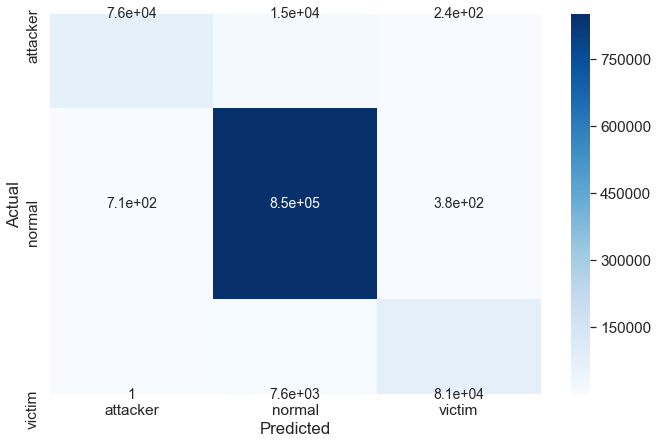

In [161]:
data = confusion_matrix(y_test_lr, y_pred_lr)
df_cm = pd.DataFrame(data, columns=np.unique(y_test_lr), index = np.unique(y_test_lr))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (11,7))
sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 14})# font size

plt.show()

In [162]:
print('confusion_matrix: \n',confusion_matrix(y_test_lr, y_pred_lr))   #predicted data

confusion_matrix: 
 [[ 76195  14576    238]
 [   713 850711    378]
 [     1   7631  80630]]


The following are two checks that we have done in which we create a confusion matrix with the same variables, in this way they should be perfect.

In [163]:
confusion_matrix(y_test_lr, y_test_lr)     #test data

array([[ 91009,      0,      0],
       [     0, 851802,      0],
       [     0,      0,  88262]], dtype=int64)

In [164]:
confusion_matrix(y_train_lr, y_train_lr)   #training data

array([[ 75124,      0,      0],
       [     0, 700513,      0],
       [     0,      0,  69515]], dtype=int64)

Here we are saving some useful variables that we will use later:

In [165]:
accuracy_score_lr = accuracy_score(y_test_lr,y_pred_lr)

classification_report_lr = classification_report(y_test_lr,y_pred_lr,digits=5)

balanced_accuracy_score_lr = balanced_accuracy_score(y_test_lr,y_pred_lr)

confusion_matrix_true_lr = confusion_matrix(y_test_lr, y_test_lr)

confusion_matrix_pred_lr = confusion_matrix(y_test_lr,y_pred_lr)

#### Pros and Cons of Logistic Regression

##### Pros:
- produces well-calibrated probability estimates;
- can be trained efficently and in distributed manner;
- scales well to million of features.

##### Cons:
- assumes feature values are <b>linearly related</b> to log odds;
- features should be relatively independent of one another;
- typically requires a larger sample size compered to other machine learning algorithms.

### 8.2. GaussianNB

The next classifier we are going to use is the GaussianNB (another linear classifier).
Note that one of our dataset is the different number of samples for the three classes, and we can't perform <b>smoothing</b> to add "phantom" samples to labelled data for each feature.

Naive Bayes methods are a set of supervised learning algorithms based on applying Bayes’ theorem with the “naive” assumption of conditional independence between every pair of features given the value of the class variable. This assumption never actually holds in real life! For this reason probability estimates generated by Naive Bayes are over-confident, due to conditional independence assumption being violated, so probabilities are not well calibrated.

- GaussianNB implements the Gaussian Naive Bayes algorithm for classification. The likelihood of the features is assumed to be Gaussian.

- https://scikit-learn.org/stable/modules/naive_bayes.html
    
- https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html#sklearn.naive_bayes.GaussianNB

We are going to create different lists of columns to drop and to keep that we are going to mark with "nb".
We decided to create again this cell because we tried a lot of different solution trying to obtain better results.

In [166]:
numeric_cols_nb = ['Duration','final_bytes','Packets','Cum Count Src IP Addr (10 seconds)','Cum Count Dst IP Addr (10 seconds)']
nominal_cols_nb = ['Proto','Flags','Src IP category','Dst IP category','day-of-week','time-of-day']
other_cols_nb = ['Src IP Addr','Dst IP Addr','Src Pt','Dst Pt','Tos','Date first seen']
label_cols_nb = ['class','attackType','attackID','attackDescription']

In [167]:
df_drop_col.columns

Index(['Date first seen', 'Duration', 'Proto', 'Src IP Addr', 'Src Pt',
       'Dst IP Addr', 'Dst Pt', 'Packets', 'Flags', 'Tos', 'class',
       'attackType', 'attackID', 'attackDescription', 'day-of-week',
       'time-of-day', 'final_bytes', 'Src IP category', 'Dst IP category',
       'Cum Count Src IP Addr (10 seconds)',
       'Cum Count Dst IP Addr (10 seconds)'],
      dtype='object')

In [168]:
df_before_train_nb_0 = df_drop_col.drop(other_cols_nb,axis=1)
df_before_test_nb_0 = test_dataset_drop_col.drop(other_cols_nb,axis=1)
# df_before_train_nb = df_before_train_nb_0.drop(nominal_cols_nb,axis=1)
# df_before_test_nb = df_before_test_nb_0.drop(nominal_cols_nb,axis=1)

In [169]:
df_before_train_nb = pd.get_dummies(df_before_train_nb_0, columns=nominal_cols_nb) 
df_before_test_nb = pd.get_dummies(df_before_test_nb_0, columns=nominal_cols_nb)

In [170]:
X_train_nb = df_before_train_nb.drop(label_cols,axis=1)
X_test_nb = df_before_test_nb.drop(label_cols,axis=1)
y_train_nb = df_before_train_nb['class']
y_test_nb = df_before_test_nb['class']

In [171]:
from sklearn.preprocessing import StandardScaler

Now we are going to use the StandardScaler in order to remove the mean and scaling to unit variance. 

In [172]:
# class sklearn.preprocessing.StandardScaler(copy=True, with_mean=True, with_std=True)
standard_scaler = StandardScaler().fit(X_train_nb[numeric_cols])
# fit(self, X[, y])

X_train_nb[numeric_cols] = standard_scaler.transform(X_train_nb[numeric_cols])
X_test_nb[numeric_cols] = standard_scaler.transform(X_test_nb[numeric_cols])

After having defined the new train and test datasets and the new X and y variables we can start to .fit() our classifier.

In [173]:
# X_train_nb

In [174]:
# start the timer
start_time = time.time()
#print(time.time())

clf_nb = GaussianNB().fit(X_train_nb, y_train_nb)

# stop the timer and print the result
elapsed_training_time_nb = time.time() - start_time
print("Elapsed time %.2f seconds" % elapsed_training_time_nb)

Elapsed time 4.98 seconds


As we did for the logistic regression classifier we can check the names of the classes known to check if they all appear.

In [175]:
clf_nb.classes_   #class labels known to the classifier

array(['attacker', 'normal', 'victim'], dtype='<U8')

With gaussian we can also do other interesting calculations, such as:
1. Probability of each class

In [176]:
clf_nb.class_prior_  

array([0.08888815, 0.82886037, 0.08225148])

2. Number of samples for each class

In [177]:
clf_nb.class_count_ 

array([ 75124., 700513.,  69515.])

3. Theta

In [178]:
# clf_nb.theta_  # mean of each feature per class

4. Variance of each feature per class

In [179]:
# clf_nb.sigma_ 

After the calculation we can start the prediction on our X_test_nb variable.

In [180]:
# start the timer
start_time = time.time()

y_pred_nb = clf_nb.predict(X_test_nb)

# stop the timer and print the result
elapsed_prediction_time_nb = time.time() - start_time
print("Elapsed time %.2f seconds" % elapsed_prediction_time_nb)

Elapsed time 7.22 seconds


In [181]:
set(y_pred_nb)

{'attacker', 'normal', 'victim'}

Using the previous metric:  $\text{accuracy} = \frac{TP + TN}{TP + TN + FP + FN}$ 

In [182]:
clf_nb.score(X_test_nb,y_test_nb)

0.9990970571433836

In [183]:
print('classification_report: \n', classification_report(y_pred_nb, y_test_nb,digits=5))

classification_report: 
               precision    recall  f1-score   support

    attacker    0.99573   0.99784   0.99678     90816
      normal    0.99992   0.99925   0.99958    852372
      victim    0.99466   0.99893   0.99679     87885

    accuracy                        0.99910   1031073
   macro avg    0.99677   0.99867   0.99772   1031073
weighted avg    0.99910   0.99910   0.99910   1031073



Using the confusion matrix (with and without seaborn) we can have a better representation of the accuracy of the classifier.

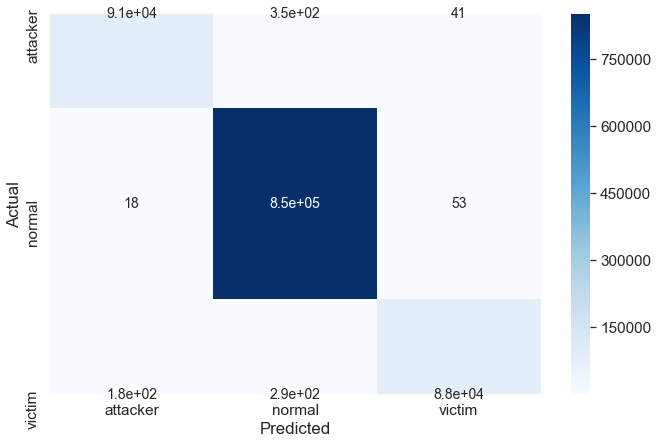

In [184]:
data = confusion_matrix(y_test_nb, y_pred_nb)
df_cm = pd.DataFrame(data, columns=np.unique(y_test_nb), index = np.unique(y_test_nb))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (11,7))
sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 14})# font size

plt.show()

In [185]:
print('confusion_matrix: \n',confusion_matrix(y_test_nb, y_pred_nb))

confusion_matrix: 
 [[ 90620    348     41]
 [    18 851731     53]
 [   178    293  87791]]


Here there are also the tests that we did for logistic regression and they give the same (correct) results.

In [186]:
confusion_matrix(y_train_nb, y_train_nb)

array([[ 75124,      0,      0],
       [     0, 700513,      0],
       [     0,      0,  69515]], dtype=int64)

In [187]:
confusion_matrix(y_test_nb, y_test_nb)

array([[ 91009,      0,      0],
       [     0, 851802,      0],
       [     0,      0,  88262]], dtype=int64)

Here we are saving some useful variables that we will use later:

In [188]:
accuracy_score_nb = accuracy_score(y_test_nb,y_pred_nb)

classification_report_nb = classification_report(y_test_nb,y_pred_nb,digits=5)

balanced_accuracy_score_nb = balanced_accuracy_score(y_test_nb,y_pred_nb)

confusion_matrix_true_nb = confusion_matrix(y_test_nb, y_test_nb)

confusion_matrix_pred_nb = confusion_matrix(y_test_nb,y_pred_nb)

#### Pros and Cons of Naive Bayes

##### Pros:
- very fast to estimate NB model;
- reliable predictor if there is not too much data available;
- if conditional independence assumption is valid, then it's the best classifier.

##### Cons:
- being a generative classifier, it does not tend to perform quite as well on large data as discriminative classifiers (such as Logistic Regression);
- does not give well calibrated probability estimates

### 8.3. Decision Tree

The next classifier we want to test is the decision tree. As we did with the other two before we first create the variables x and y and then we use .fit() to train tha algorithm. In the variables we drop all the useless columns of the dataframe.

- https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

Decision Trees (DTs) are a non-parametric versatile supervised learning method used for classification and regression. The goal is to create a model that predicts the value of a target variable by learning simple decision rules inferred from the data features. They are easy to interpret and are an intuitive way of analyzing data. Here some fundamental characteristics: 

- they are binary tree data structure used to make prediction;
- can predict both categorical values <b>(classification trees)</b> and real values <b>(regression trees)</b>;
- can take numerical and categorical data <b>!!! no binarization or normalization required !!!</b>.

##### Tree construction:
(Top-down contruction of decision tree)
1. start with the entire dataset;
2. recursively partition data into smaller groups 
    - by splitting on one attribute at a time, choose attribute&split point to best separate the classes 
3. stop splitting region when
    - only contain samples from one class (PURE region)
    - predefibed maximum depth reached or child will contain fewer than minimum samples

In [189]:
X_train_DT = df_before_train.drop(label_cols,axis=1)
X_test_DT = df_before_test.drop(label_cols,axis=1)
y_train_DT = df_before_train['class']
y_test_DT = df_before_test['class']

In [190]:
# start the timer
start_time = time.time()
#print(time.time())

clf_DT = DecisionTreeClassifier(criterion='gini',splitter='best').fit(X_train_DT, y_train_DT)

# stop the timer and print the result
elapsed_training_time_DT = time.time() - start_time
print("Elapsed time %.2f seconds" % elapsed_training_time_DT)

Elapsed time 9.68 seconds


As a check we control the classes registered by the algorithm.

In [191]:
clf_DT.classes_

array(['attacker', 'normal', 'victim'], dtype=object)

With the decision tree we can check which of the features given is the most important and which one is the least important. So, we have created a variable called "importances" in order to store the importances.

In [192]:
importances = clf_DT.feature_importances_

Then we used numpy functions to have:
- The most important feature

In [193]:
max_idx = np.argmax(importances)
print(X_train_DT.columns[max_idx])

Cum Count Src IP Addr (10 seconds)


- The least important feature

In [194]:
min_idx = np.argmin(importances)
print(X_train_DT.columns[min_idx])

Proto_IGMP 


Then we created a dictionary with the importances. (we will use this variable trying to improve our classifier's performances)

In [195]:
feature_importances_dict = dict()
for idx in range(len(X_train_DT.columns)):
    feature_importances_dict[X_train_DT.columns[idx]] = importances[idx]

In [196]:
# feature_importances_dict

Here we had some other calculations on the trained algorithm:
1. The inferred value of max_features

In [197]:
clf_DT.max_features_

68

2. The number of classes

In [198]:
clf_DT.n_classes_

3

3. The number of features after the fit

In [199]:
# clf_DT.n_features_

4. The number of outputs after the fit

In [200]:
# clf_DT.n_outputs_

5. The depth of the decision tree

In [201]:
clf_DT.get_depth()

37

6. The number of leaves in the decision tree

In [202]:
clf_DT.get_n_leaves()

484

After the calculation we started the prediction for the decision tree on the X_test_DT variable

In [203]:
# start the timer
start_time = time.time()

y_pred_DT = clf_DT.predict(X_test_DT)

# stop the timer and print the result
elapsed_prediction_time_DT = time.time() - start_time
print("Elapsed time %.2f seconds" % elapsed_prediction_time_DT)

Elapsed time 0.81 seconds


Usual check of the names of the classes on the prediction.

In [204]:
set(y_pred_DT)

{'attacker', 'normal', 'victim'}

We used the same metric to calculate the accuracy of the decision tree: $\text{accuracy} = \frac{TP + TN}{TP + TN + FP + FN}$ and we can clearly see that is better than the logistic regression and than the gaussiannb.

In [205]:
clf_DT.score(X_test_DT,y_test_DT)

0.9989515776283542

In [206]:
print('classification_report: \n', classification_report(y_pred_DT, y_test_DT))

classification_report: 
               precision    recall  f1-score   support

    attacker       0.99      1.00      0.99     90722
      normal       1.00      1.00      1.00    852162
      victim       1.00      1.00      1.00     88189

    accuracy                           1.00   1031073
   macro avg       1.00      1.00      1.00   1031073
weighted avg       1.00      1.00      1.00   1031073



The plot showing the confusion matrix (with and without seaborn) to have a better visualization of the correctness of the algorithm.

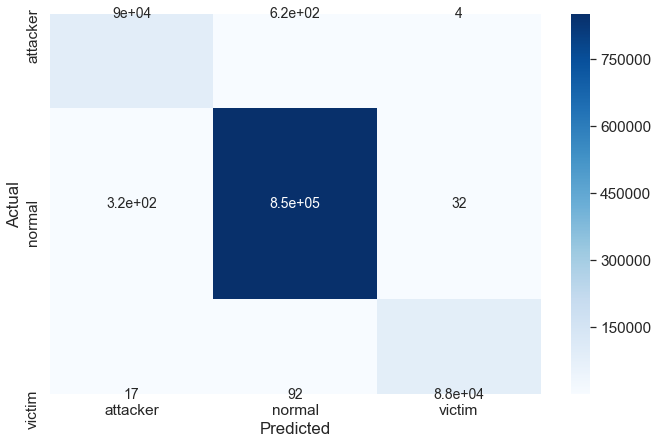

In [207]:
data = confusion_matrix(y_test_DT, y_pred_DT)
df_cm = pd.DataFrame(data, columns=np.unique(y_test_DT), index = np.unique(y_test_DT))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (11,7))
sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 14})# font size

plt.show()

In [208]:
print('confusion_matrix: \n',confusion_matrix(y_test_DT, y_pred_DT))

confusion_matrix: 
 [[ 90387    618      4]
 [   318 851452     32]
 [    17     92  88153]]


Some checks:

In [209]:
confusion_matrix(y_train_DT, y_train_DT)

array([[ 75124,      0,      0],
       [     0, 700513,      0],
       [     0,      0,  69515]], dtype=int64)

In [210]:
confusion_matrix(y_test_DT, y_test_DT)

array([[ 91009,      0,      0],
       [     0, 851802,      0],
       [     0,      0,  88262]], dtype=int64)

Here we are saving some useful variables that we will use later:

In [211]:
accuracy_score_DT = accuracy_score(y_test_DT,y_pred_DT)

classification_report_DT = classification_report(y_test_DT,y_pred_DT,digits=5)

balanced_accuracy_score_DT = balanced_accuracy_score(y_test_DT,y_pred_DT)

confusion_matrix_true_DT = confusion_matrix(y_test_DT, y_test_DT)

confusion_matrix_pred_DT = confusion_matrix(y_test_DT,y_pred_DT)

#### Pros and Cons of Decision Trees 

##### Pros:
- <b>explainable Predictions</b>:
    - every prediction is expressed as series of binary choices.
- <b>efficency</b>:
    - each sample traverses height of binary tree (time complexity O(log(n)) ) and models are efficient to train and make predictions also with large datasets.
- <b>non-linearity</b>:
    - do not use hyperplanes (as decision boundaries), but axis-aligned cuts. This allows for non-linear decision boundaries and many real wolrd problems need non-linear boundaries!!!

##### Cons:
- suffer from <b>over fitting</b>: build overly complex trees that do not generalize well;
- <b>inefficent</b> at expressing certain types of relationship (e.g. XOR requires 3 nodes);
- <b>less robust</b> than other supervised techniques (small changes to training set results in large changes to tree);
- biased towards splitting on variable with many values.

#### 8.3.1. Decision Tree with dropping

To improve the performances of the decision tree we defined a list of columns that have low or zero importance and we removed them, in order to improve the performance and maybe accuracy of the classifier. We use the feature_importances_dict to determine which are the columns with zero importance.

In [212]:
zero_importance_columns=['Proto_ICMP ','Proto_IGMP ','Proto_TCP  ','Proto_UDP  ','Flags_...R..','Flags_.A.R.F','Flags_.A.RS.','Flags_.A.RSF','Flags_.APR..','Flags_.APR.F','Flags_.APRS.','Flags_.APRSF','Src IP category_DNS','Src IP category_EXT_SERVER','Dst IP category_DNS','Dst IP category_EXT_SERVER']

In [213]:
#feature_importances_dict

In [214]:
# X_train_DT.columns

In [215]:
# X_test_DT.columns

Here in a single cell we have performed multiple operations:
1. Dropping the columns from the dataframe
2. Defining the new X_test
3. .fit() of the algorithm on the new variables
4. New prediction

In [216]:
new_X_train_DT = X_train_DT.drop(zero_importance_columns,axis=1)

new_X_test_DT = X_test_DT.drop(zero_importance_columns,axis=1)

t0 = time.time()

new_clf_DT = DecisionTreeClassifier(criterion='gini',splitter='best').fit(new_X_train_DT,y_train_DT)

elapsed_training_time_DTDropped = time.time() - t0

t01= time.time()
print("elapsed time: %.2f seconds" %  elapsed_training_time_DTDropped)

new_y_pred_DT = new_clf_DT.predict(new_X_test_DT)
      

elapsed_prediction_time_DTDropped = time.time() - t01
      
print("elapsed time: %.2f seconds" %  elapsed_prediction_time_DTDropped)

elapsed time: 14.68 seconds
elapsed time: 0.73 seconds


Test to check the number of classes of the prediction:

In [217]:
set(new_y_pred_DT)

{'attacker', 'normal', 'victim'}

Accuracy score of the new prediction:

In [218]:
new_clf_DT.score(new_X_test_DT,y_test_DT)

0.9980951882165472

In [219]:
print('classification_report: \n', classification_report(new_y_pred_DT, y_test_DT))

classification_report: 
               precision    recall  f1-score   support

    attacker       0.99      0.99      0.99     91578
      normal       1.00      1.00      1.00    851245
      victim       1.00      1.00      1.00     88250

    accuracy                           1.00   1031073
   macro avg       1.00      1.00      1.00   1031073
weighted avg       1.00      1.00      1.00   1031073



As we can see the results are not really different from the first one, instead the accuracy is even lower. The last thing we had to do is to plot the confusion matrix with relative tests (with and without seaborn).

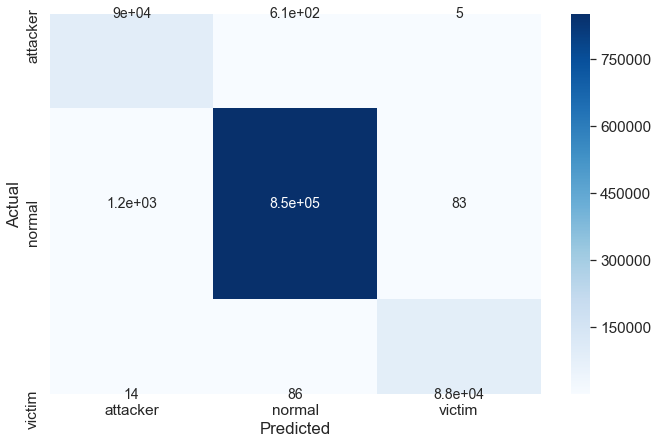

In [220]:
data = confusion_matrix(y_test_DT, new_y_pred_DT)
df_cm = pd.DataFrame(data, columns=np.unique(y_test_DT), index = np.unique(y_test_DT))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (11,7))
sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 14})# font size

plt.show()

In [221]:
print('confusion_matrix: \n',confusion_matrix(y_test_DT, new_y_pred_DT))

confusion_matrix: 
 [[ 90396    608      5]
 [  1168 850551     83]
 [    14     86  88162]]


In [222]:
confusion_matrix(y_train_DT, y_train_DT)

array([[ 75124,      0,      0],
       [     0, 700513,      0],
       [     0,      0,  69515]], dtype=int64)

In [223]:
confusion_matrix(y_test_DT, y_test_DT)

array([[ 91009,      0,      0],
       [     0, 851802,      0],
       [     0,      0,  88262]], dtype=int64)

Here we are saving some useful variables that we will use later:

In [224]:
accuracy_score_DTD = accuracy_score(y_test_DT,new_y_pred_DT)

classification_report_DTD = classification_report(y_test_DT,new_y_pred_DT,digits=5)

balanced_accuracy_score_DTD = balanced_accuracy_score(y_test_DT,new_y_pred_DT)

confusion_matrix_true_DTD = confusion_matrix(y_test_DT, y_test_DT)

confusion_matrix_pred_DTD = confusion_matrix(y_test_DT,new_y_pred_DT)


### 8.4. Random Forest

The fourth classifier we are going to use is the Random Forest classifier (Decision Forests family). As we did with others before we before define our variables and then we try to .fit our classifier.

- https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

An *ensemble* refers to a combination of multiple classifiers that creates a more complex, and often better performing, classifier. Combining decision trees into ensambles is a proved technique for creating high-quality classifiers. These ensembles are commonly named <b>*Decision Forest*</b>. The two most common types are *Random Forests* and *Gradient-boosted Decision Trees*, we will focus only on the first ones.

<b>Random Forests</b> are formed by simple ensembling of multiple decision trees, typically ranging from tens to thousands of trees. After training each individual decision tree, overall random forest predictions are made by taking statistical mode of individual tree predictions for <b>classification</b> trees and the statistical mean of individual tree predictions for *regression trees*.

Individual trees are powerful but not robust. Ensembling makes them more robust providing trees <b>not too similar</b> to each other. Random Forest ensure *trees are dissimilar* by:

- bagging the data: randomly draw a new subset of training data to train each tree;
- randomizing features: randomly draw subset of features from which to pick best split point;
    - for classification: subset size = sqrt(#features)

In [225]:
X_train_RF = df_before_train.drop(label_cols,axis=1)
X_test_RF = df_before_test.drop(label_cols,axis=1)
y_train_RF = df_before_train['class']
y_test_RF = df_before_test['class']

In [226]:
# start the timer
start_time = time.time()
#print(time.time())

clf_RF = RandomForestClassifier(criterion='gini',verbose=1,warm_start=True,).fit(X_train_RF, y_train_RF)

# stop the timer and print the result
elapsed_training_time_RF = time.time() - start_time
print("Elapsed time %.2f seconds" % elapsed_training_time_RF)

C:\Users\Utente\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Elapsed time 8.69 seconds


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    6.6s finished


The child estimator template is used to create the collection of fitted sub-estimators.

In [227]:
clf_RF.base_estimator_

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

The collection of fitted sub-estimators.

In [228]:
#clf_RF.estimators_

Some information about the classifier:
1. List of classes

In [229]:
clf_RF.classes_

array(['attacker', 'normal', 'victim'], dtype=object)

2. Number of classes

In [230]:
clf_RF.n_classes_

3

3. Number of features

In [231]:
clf_RF.n_features_

68

4. Number of outputs

In [232]:
clf_RF.n_outputs_

1

5. Importances

In [233]:
importances = clf_RF.feature_importances_

- Most important

In [234]:
max_idx = np.argmax(importances)
print(X_train_RF.columns[max_idx])

Cum Count Src IP Addr (10 seconds)


- Least important

In [235]:
min_idx = np.argmin(importances)
print(X_train_RF.columns[min_idx])

Proto_IGMP 


- Dictionary with the importances (so we can have a look of the most important features of our dataset)

In [236]:
feature_importances_dict = dict()
for idx in range(len(X_train_RF.columns)):
    feature_importances_dict[X_train_RF.columns[idx]] = importances[idx]

In [237]:
#feature_importances_dict

Then we started our prediction (as usual we used .time() in order to calculate the computation time).

In [238]:
# start the timer
start_time = time.time()

y_pred_RF = clf_RF.predict(X_test_RF)

# stop the timer and print the result
elapsed_prediction_time_RF = time.time() - start_time
print("Elapsed time %.2f seconds" % elapsed_prediction_time_RF)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Elapsed time 1.68 seconds


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.9s finished


Using the same metric: $\text{accuracy} = \frac{TP + TN}{TP + TN + FP + FN}$ we can actually see how the performances have slightly improved from the decision tree.

In [239]:
clf_RF.score(X_test_RF,y_test_RF)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.9s finished


0.9993104270987603

In [240]:
print('classification_report: \n', classification_report(y_pred_RF, y_test_RF))

classification_report: 
               precision    recall  f1-score   support

    attacker       0.99      1.00      1.00     90468
      normal       1.00      1.00      1.00    852438
      victim       1.00      1.00      1.00     88167

    accuracy                           1.00   1031073
   macro avg       1.00      1.00      1.00   1031073
weighted avg       1.00      1.00      1.00   1031073



Plotting the confusion matrix (with and without seaborn):

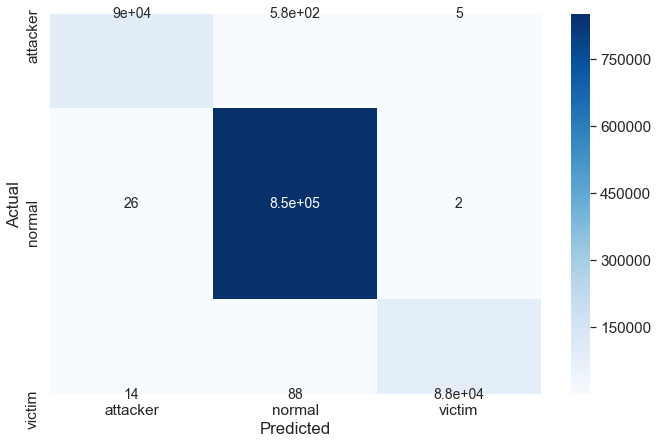

In [241]:
data = confusion_matrix(y_test_RF, y_pred_RF)
df_cm = pd.DataFrame(data, columns=np.unique(y_test_RF), index = np.unique(y_test_RF))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (11,7))
sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 14})# font size

plt.show()

In [242]:
print('confusion_matrix: \n',confusion_matrix(y_test_RF, y_pred_RF))

confusion_matrix: 
 [[ 90428    576      5]
 [    26 851774      2]
 [    14     88  88160]]


Final checks for Random Forest classifier:

In [243]:
confusion_matrix(y_train_RF, y_train_RF)

array([[ 75124,      0,      0],
       [     0, 700513,      0],
       [     0,      0,  69515]], dtype=int64)

In [244]:
confusion_matrix(y_test_RF, y_test_RF)

array([[ 91009,      0,      0],
       [     0, 851802,      0],
       [     0,      0,  88262]], dtype=int64)

Here we are saving some useful variables that we will use later:

In [245]:
accuracy_score_RF = accuracy_score(y_test_RF,y_pred_RF)

classification_report_RF = classification_report(y_test_RF,y_pred_RF,digits=5)

balanced_accuracy_score_RF = balanced_accuracy_score(y_test_RF,y_pred_RF)

confusion_matrix_true_RF = confusion_matrix(y_test_RF, y_test_RF)

confusion_matrix_pred_RF = confusion_matrix(y_test_RF,y_pred_RF)

#### Pros and Cons of Random Forest

##### Pros:
- <b>prevents overfitting the training set</b> by averaging over multiple random trees usually improves test performance;
- <b>efficient to train</b> each tree learn indipendently of others.

##### Cons:
- <b>Increased complexity</b>: much more *storage intensive* and predictions are harder to explain than with a single Decision Tree.

## 9. Improving the classifiers

In this paragraph we are going to modify our data in order to improve the efficiency and the accuracy of our classifiers.

### 9.1. Data preparation

#### 9.1.1. Scaling

The first thing we are going to do is to import from sklearn the StandarScaler, useful to standardize the features.

Standardization of a dataset is a common requirement for many machine learning estimators: they might behave badly if the individual features do not more or less look like standard normally distributed data (e.g. Gaussian with 0 mean and unit variance).

For instance many elements used in the objective function of a learning algorithm (such as the RBF kernel of Support Vector Machines or the L1 and L2 regularizers of linear models) assume that all features are centered around 0 and have variance in the same order. If a feature has a variance that is orders of magnitude larger that others, it might dominate the objective function and make the estimator unable to learn from other features correctly as expected.

In [246]:
from sklearn.preprocessing import StandardScaler

We define our variables dropping the useless columns that have been grouped before in lists.

In [247]:
#numeric_cols = ['Duration','final_bytes','Packets','Cum Count Src IP Addr (10 seconds)','Cum Count Dst IP Addr (10 seconds)']
#nominal_cols = ['Proto','Flags','Src IP category','Dst IP category','day-of-week','time-of-day']
#other_cols = ['Src IP Addr','Dst IP Addr','Src Pt','Dst Pt','Tos','Date first seen']
#label_cols = ['class','attackType','attackID','attackDescription']

In [248]:
X_train = df_before_train.drop(label_cols,axis=1)
X_test = df_before_test.drop(label_cols,axis=1)
y_train = df_before_train['class']
y_test = df_before_test['class']

In [249]:
#X_train[numeric_cols]

Now we are going to use the StandardScaler in order to remove the mean and scaling to unit variance.

In [250]:
# class sklearn.preprocessing.StandardScaler(copy=True, with_mean=True, with_std=True)
standard_scaler = StandardScaler().fit(X_train[numeric_cols])
# fit(self, X[, y])

X_train[numeric_cols] = standard_scaler.transform(X_train[numeric_cols])
X_test[numeric_cols] = standard_scaler.transform(X_test[numeric_cols])

Now the variables in the numeric columns have been standardized.

In [251]:
X_train[numeric_cols].head(5)

,Duration,final_bytes,Packets,Cum Count Src IP Addr (10 seconds),Cum Count Dst IP Addr (10 seconds)
0,-0.087898,-0.008794,-0.010122,-0.369322,-0.368089
1,0.073854,-0.008793,-0.012166,-0.369322,-0.368089
2,-0.145760,-0.008702,-0.013189,-0.369322,-0.360503
3,-0.149705,-0.009143,-0.014211,-0.369322,-0.368089
4,0.200099,-0.009089,-0.013189,-0.369322,-0.368089


In [252]:
X_test[numeric_cols].head(5)

,Duration,final_bytes,Packets,Cum Count Src IP Addr (10 seconds),Cum Count Dst IP Addr (10 seconds)
0,-0.144445,-0.009162,-0.013189,-0.369322,-0.368089
1,-0.149705,-0.009195,-0.014211,-0.369322,-0.368089
2,0.155387,-0.009089,-0.013189,-0.369322,-0.368089
3,-0.149705,-0.009209,-0.014211,-0.369322,-0.368089
4,-0.149705,-0.009222,-0.014211,-0.369322,-0.368089


#### 9.1.2. Converting label to integers

In this paragraph we are going to transform the label variables into integers. Trying to see if the results will be affected by this process or not. Specifically we are going to change the value "normal" with a 0 and the values "victim" and "attacker" with 1. We are going to store those data in two new lists that we will transform again later.

In [253]:
# y_train.unique()

In [254]:
# y_test.unique()

In [255]:
binary_lab_y_train = []
for element in y_train.values:
    if element == 'normal':
        binary_lab_y_train.append(0)
    else:
        binary_lab_y_train.append(1)

In [256]:
binary_lab_y_test = []
for element in y_test.values:
    if element == 'normal':
        binary_lab_y_test.append(0)
    else:
        binary_lab_y_test.append(1)

Some checks:

In [257]:
# len(binary_lab_y_test)

In [258]:
# len(binary_lab_y_train)

Now we are going to trasform again the list using the pandas.series so we can use this object for the following functions.

In [259]:
y_train_bin = pd.Series(binary_lab_y_train)

In [260]:
y_test_bin = pd.Series(binary_lab_y_test)

In [261]:
print(type(y_train))
print(type(y_train_bin))

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


In [262]:
# y_train.values

Checks:

In [263]:
# y_train.head(30)

In [264]:
# y_train_bin.head(30)

In [265]:
# y_train_bin.value_counts()

In [266]:
# y_test_bin.value_counts()

#### 9.1.3. Cross validation with GridSearch

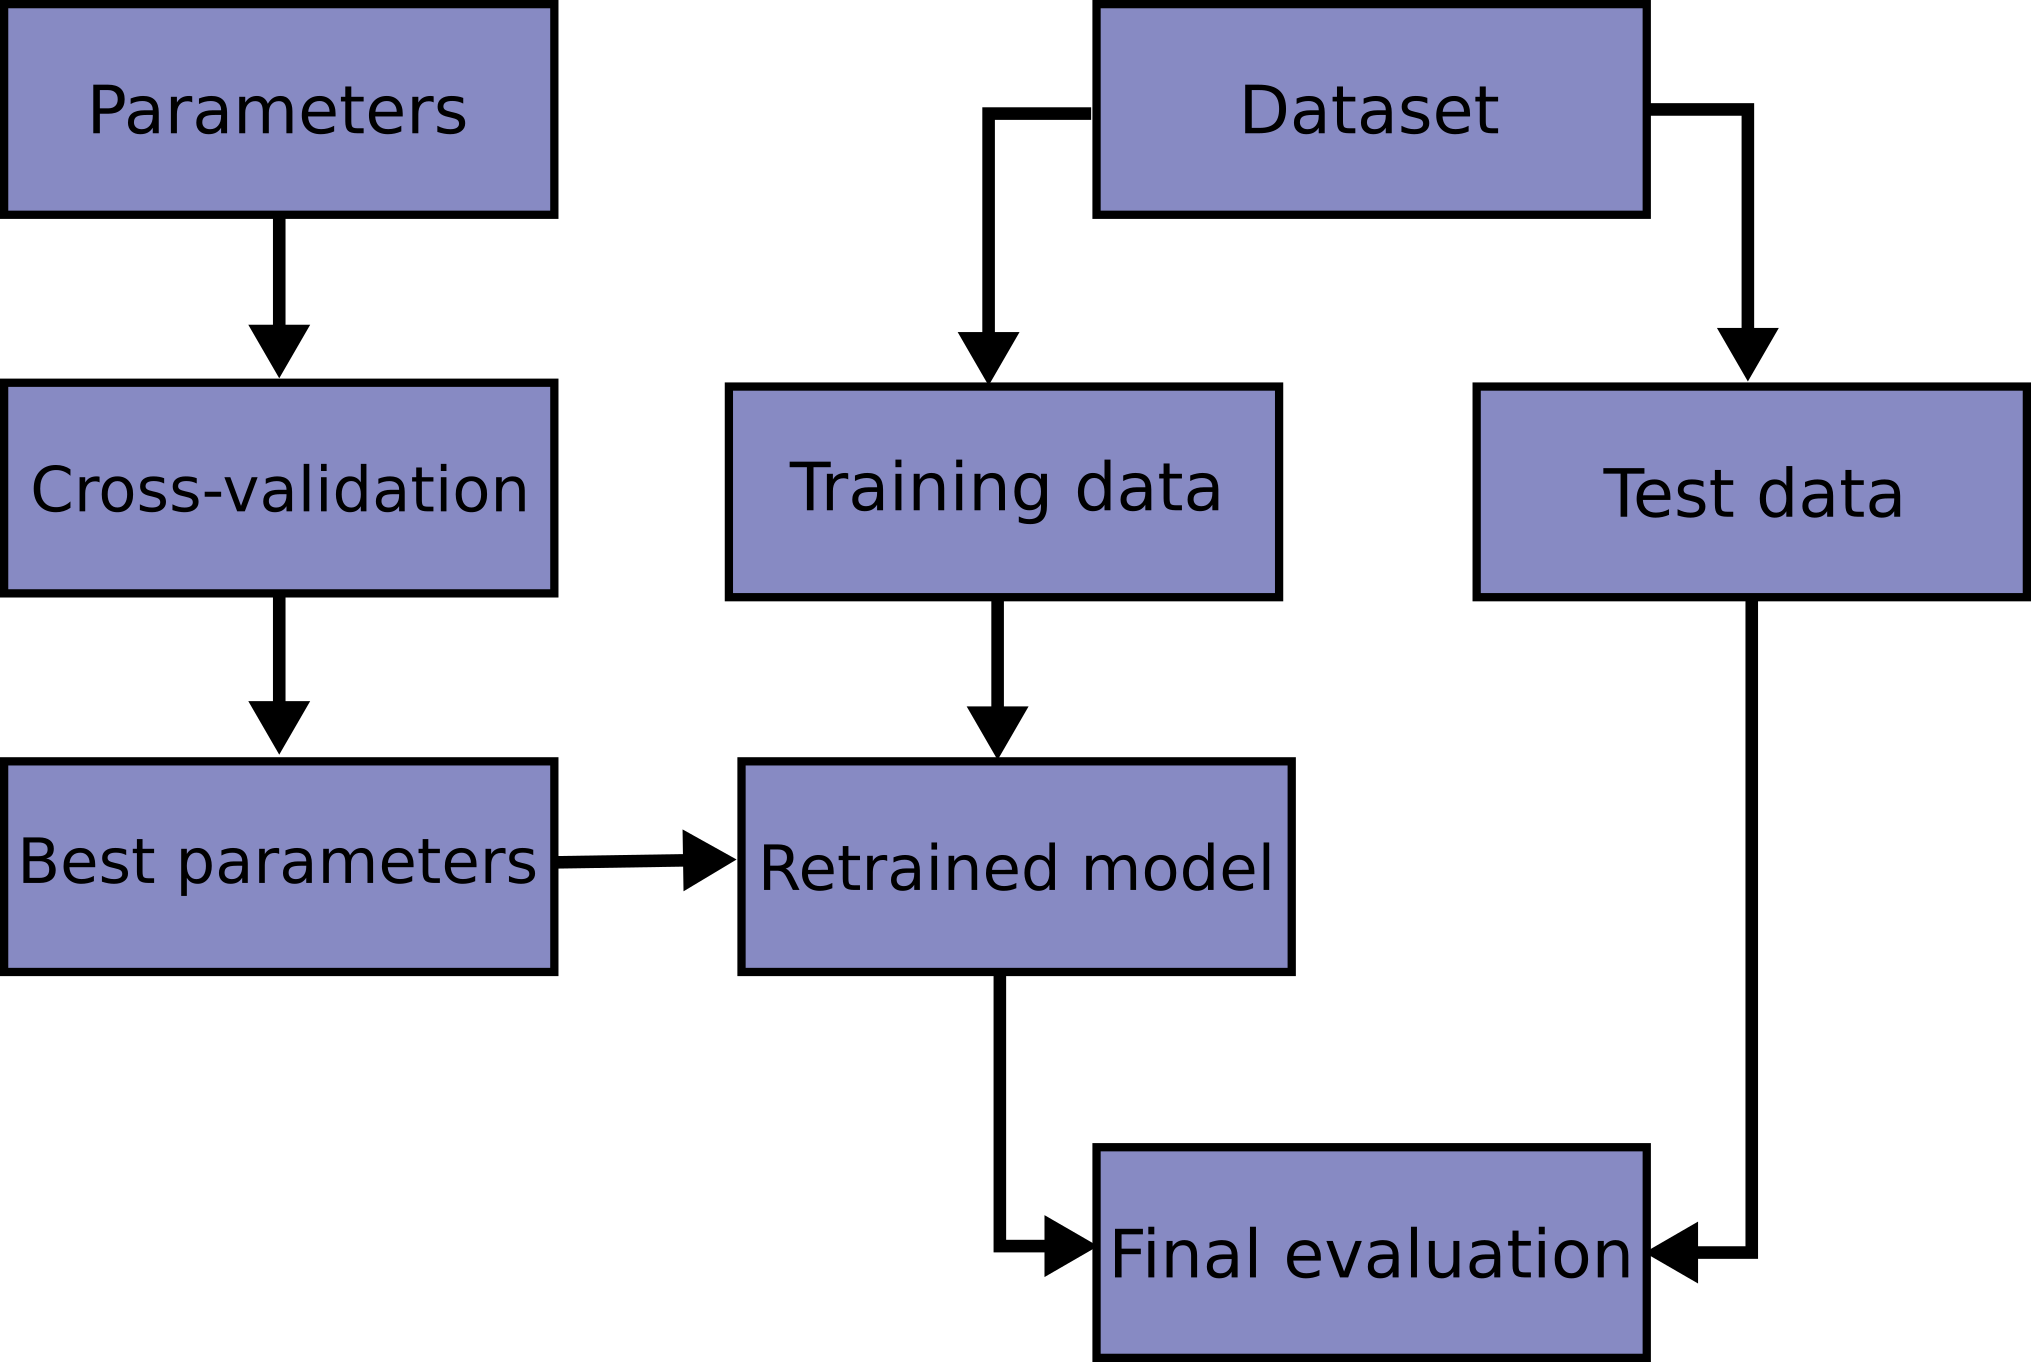

We are looking for a better estimate of our predictions, so we try to perform cross-validation on our classifiers. 

Ideally we want a lots of data for training to create a better model (with better predictions), and a lots of data for testing to obtain a better estimate of performance. We pursuit this goal performing *k-fold cross-validation*.
With this method we will divide the labeled data into *k* equal parts and train k different models:

- each model "holds out" a different one of *k* parts of data for validation (testing) and trains on the remaining *k-1* parts. The held-out part is then use for validation.
- then, the *k* different models are combined by averaging both the performance statistics and the model parameters.

<b>NB. the time required will increase </b>

To execute the cross validation we have to import from sklearn GridSearch and Pipeline

In [267]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

Now we have to train a model for performing binary classification.

We have to perform cross validation and hyperparameters selections in order to find the best performing model.

- This line defines the model, in this case a RandomForestClassifier but it could be any classifier (DecisionTreeClassifier, SVC, etc.)

##### 9.1.3.1. Random Forest Classifier with binary

In [268]:
classifier = RandomForestClassifier()

Pipeline() is used to chain multiple estimators into one and hence, automate the machine learning process. This is extremely useful as there are often a fixed sequence of steps in processing the data. For this, it enables setting parameters of the various steps using their names and the parameter name separated by a ‘__’. A step’s estimator may be replaced entirely by setting the parameter with its name to another estimator, or a transformer removed by setting it to ‘passthrough’ or None.

https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html

In [269]:
pipe = Pipeline(steps=[('clf', classifier)])

Parameters of the model in the pipeline can be set using `'__'` separated parameter names. In this case, `'clf__n_estimator'` means that the following list is a list of values for the n_estimators attribute of the clf model. Here, it is the number of trees of the RandomForest

In [270]:
param_grid = {
    'clf__n_estimators': [10, 15, 20, 25, 30, 35],
} 

<b> NB. param_grid is a dictionary with parameters names (string) as keys and a list of parameter settings to try as values, or a list of such dictionaries, in which case the grids spanned by each dictionary in the list are explored. This enables searching over any sequence of parameter settings.

We can perrform cross validation for each of the parameters set above. `cv=3` means that we perform 3-fold cross validation, usually are (10 or more *k* but we dont want to increase too much the required time)

 class sklearn.model_selection.GridSearchCV(estimator,param_grid,scoring=None,n_jobs=None,iid=’warn’,refit=True,cv=’warn’,verbose=0,
 pre_dispatch=‘2*n_jobs’,error_score=’raise-deprecating’, return_train_score=False)
 
- https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

Cross validation process:

1. Shuffle the dataset randomly.

2. Split the dataset into k group

3. For each unique group:

        - Take the group as a hold out or test data set
        - Take the remaining groups as a training data set
        - Fit a model on the training set and evaluate it on the test set
        - Retain the evaluation score and discard the model
    
4. Summarize the skill of the model using the sample of model evaluation scores.

<b>NB. Obviously the operation will take much more time than the ones we performed before.</b>

In [271]:
start_time = time.time()

searchRF_bin = GridSearchCV(pipe, param_grid, iid=False, cv=3, verbose=True)

searchRF_bin.fit(X_train, y_train_bin)

elapsed_training_time_trainedRF_bin = time.time() - start_time
print("Elapsed time %.2f seconds" % elapsed_training_time_trainedRF_bin)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:  3.1min finished


Elapsed time 202.54 seconds


We can check from the dictionary we have created above the best parameter:

In [272]:
print(searchRF_bin.best_params_)

{'clf__n_estimators': 30}


storing best_params_ variable to use it for the final summary

In [273]:
searchRF_bin_best = searchRF_bin.best_estimator_

Here we are asking to retrieve the best estimator parameter in order to use that one while performing the prediction on the test dataframe.

In [274]:
trainedRF_bin = searchRF_bin_best.get_params()['clf']

Here we start the prediction utilizing the best parameter:

In [275]:
start_time = time.time()

y_pred_trainedRF_bin = trainedRF_bin.predict(X_test)

elapsed_prediction_time_trainedRF_bin = time.time() - start_time
print("Elapsed time %.2f seconds" % elapsed_prediction_time_trainedRF_bin)

Elapsed time 3.31 seconds


- Metrics utilized for the check:
    - $\text{accuracy} = \frac{TP + TN}{TP + TN + FP + FN}$
    - $\text{precision} = \frac{TP}{TP + FP}$; (a.k.a. positive predictive value)
    - $\text{recall} = \frac{TP}{TP + FN}$; (a.k.a. sensitivity, hit rate, true positive rate)

In [276]:
print("accuracy:", accuracy_score(y_test_bin,y_pred_trainedRF_bin)) 
print("recall:", recall_score(y_test_bin,y_pred_trainedRF_bin))
print("precision:", precision_score(y_test_bin,y_pred_trainedRF_bin))

accuracy: 0.9992939394203902
recall: 0.9961455003876812
precision: 0.9997928528639491


Some check for the confusion matrix, followed by the actual confusion matrix utilizing the prediction:

In [277]:
print('confusion_matrix-train_bin: \n',confusion_matrix(y_train_bin, y_train_bin))
print('confusion_matrix-test_bin: \n',confusion_matrix(y_test_bin, y_test_bin))
print('confusion_matrix-pred_trainedRF_bin vs test_bin: \n',confusion_matrix(y_pred_trainedRF_bin, y_test_bin))

confusion_matrix-train_bin: 
 [[700513      0]
 [     0 144639]]
confusion_matrix-test_bin: 
 [[851802      0]
 [     0 179271]]
confusion_matrix-pred_trainedRF_bin vs test_bin: 
 [[851765    691]
 [    37 178580]]


Here we are saving some useful variables that we will use later:

In [278]:
accuracy_score_RF_bin = accuracy_score(y_test_bin,y_pred_trainedRF_bin)

classification_report_RF_bin = classification_report(y_test_bin,y_pred_trainedRF_bin,digits=5)

balanced_accuracy_score_RF_bin = balanced_accuracy_score(y_test_bin,y_pred_trainedRF_bin)

confusion_matrix_true_RF_bin = confusion_matrix(y_test_bin, y_test_bin)

confusion_matrix_pred_RF_bin = confusion_matrix(y_test_bin,y_pred_trainedRF_bin)

##### 9.1.3.2. Decision Tree with binary

Training the decision tree classifier utilizing the various parameters in order to search for the best estimator. Training only with binary labels:

In [279]:
start_time = time.time()

classifier = DecisionTreeClassifier()

pipe = Pipeline(steps=[('clf', classifier)])

param_grid = {
    'clf__max_leaf_nodes': [100,200,None],
    'clf__max_depth': [25, 35, 45],
}

searchDT_bin = GridSearchCV(pipe, param_grid, iid=False, cv=3, verbose=True)
searchDT_bin.fit(X_train, y_train_bin)
searchDT_bin_best = searchDT_bin.best_estimator_
print(searchDT_bin_best)

trainedDT_bin = searchDT_bin_best.get_params()['clf']

elapsed_training_time_trainedDT_bin = time.time() - start_time
print("Elapsed time %.2f seconds" % elapsed_training_time_trainedDT_bin)

Fitting 3 folds for each of 9 candidates, totalling 27 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  27 out of  27 | elapsed:  2.4min finished


Pipeline(memory=None,
         steps=[('clf',
                 DecisionTreeClassifier(class_weight=None, criterion='gini',
                                        max_depth=25, max_features=None,
                                        max_leaf_nodes=100,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=1, min_samples_split=2,
                                        min_weight_fraction_leaf=0.0,
                                        presort=False, random_state=None,
                                        splitter='best'))],
         verbose=False)
Elapsed time 153.35 seconds


Prediction utilizing the best estimator:

In [280]:
start_time = time.time()

y_pred_trainedDT_bin = trainedDT_bin.predict(X_test)

elapsed_prediction_time_trainedDT_bin = time.time() - start_time
print("Elapsed time %.2f seconds" % elapsed_prediction_time_trainedDT_bin)

Elapsed time 0.67 seconds


- Metrics utilized for the check:
    - $\text{accuracy} = \frac{TP + TN}{TP + TN + FP + FN}$
    - $\text{precision} = \frac{TP}{TP + FP}$; (a.k.a. positive predictive value)
    - $\text{recall} = \frac{TP}{TP + FN}$; (a.k.a. sensitivity, hit rate, true positive rate)

In [281]:
print("accuracy:", accuracy_score(y_test_bin,y_pred_trainedDT_bin)) 
print("recall:", recall_score(y_test_bin,y_pred_trainedDT_bin))
print("precision:", precision_score(y_test_bin,y_pred_trainedDT_bin))

accuracy: 0.9991998626673378
recall: 0.9957773426823078
precision: 0.9996192225420255


Confusion matrix for the checks followed by the actual confusion matrix of the prediction:

In [282]:
print('confusion_matrix-train_bin: \n',confusion_matrix(y_train_bin, y_train_bin))
print('confusion_matrix-test_bin: \n',confusion_matrix(y_test_bin, y_test_bin))
print('confusion_matrix-pred_trainedDT_bin vs test_bin: \n',confusion_matrix(y_pred_trainedDT_bin, y_test_bin))

confusion_matrix-train_bin: 
 [[700513      0]
 [     0 144639]]
confusion_matrix-test_bin: 
 [[851802      0]
 [     0 179271]]
confusion_matrix-pred_trainedDT_bin vs test_bin: 
 [[851734    757]
 [    68 178514]]


Here we are saving some useful variables that we will use later:

In [283]:
accuracy_score_DT_bin = accuracy_score(y_test_bin,y_pred_trainedDT_bin)

classification_report_DT_bin = classification_report(y_test_bin,y_pred_trainedDT_bin,digits=5)

balanced_accuracy_score_DT_bin = balanced_accuracy_score(y_test_bin,y_pred_trainedDT_bin)

confusion_matrix_true_DT_bin = confusion_matrix(y_test_bin, y_test_bin)

confusion_matrix_pred_DT_bin = confusion_matrix(y_test_bin,y_pred_trainedDT_bin)

##### 9.1.3.3. GaussianNB with binary

Here we are trying to train again the GaussianNB utilizing binary labels:

In [284]:
start_time = time.time()

classifier = GaussianNB()

bin_NB = classifier.fit(X_train, y_train_bin)

elapsed_training_time_NB_bin = time.time() - start_time
print("Elapsed time %.2f seconds" % elapsed_training_time_NB_bin)

Elapsed time 1.73 seconds


Prediction:

In [285]:
start_time = time.time()

y_pred_bin_NB = bin_NB.predict(X_test)

elapsed_prediction_time_NB_bin = time.time() - start_time
print("Elapsed time %.2f seconds" % elapsed_prediction_time_NB_bin)

Elapsed time 2.58 seconds


- Metrics utilized for the check:
    - $\text{accuracy} = \frac{TP + TN}{TP + TN + FP + FN}$
    - $\text{precision} = \frac{TP}{TP + FP}$; (a.k.a. positive predictive value)
    - $\text{recall} = \frac{TP}{TP + FN}$; (a.k.a. sensitivity, hit rate, true positive rate)

In [286]:
print("accuracy:", accuracy_score(y_test_bin,y_pred_bin_NB)) 
print("recall:", recall_score(y_test_bin,y_pred_bin_NB))
print("precision:", precision_score(y_test_bin,y_pred_bin_NB))

accuracy: 0.9993598901338703
recall: 0.9964244077402369
precision: 0.9998936462000907


Here there are the usual checks with confusion matrix, followed by one created with the prediction:

In [287]:
print('confusion_matrix-train_bin: \n',confusion_matrix(y_train_bin, y_train_bin))
print('confusion_matrix-test_bin: \n',confusion_matrix(y_test_bin, y_test_bin))
print('confusion_matrix-pred_bin_NB vs test_bin: \n',confusion_matrix(y_pred_bin_NB, y_test_bin))

confusion_matrix-train_bin: 
 [[700513      0]
 [     0 144639]]
confusion_matrix-test_bin: 
 [[851802      0]
 [     0 179271]]
confusion_matrix-pred_bin_NB vs test_bin: 
 [[851783    641]
 [    19 178630]]


Here we are saving some useful variables that we will use later:

In [288]:
accuracy_score_NB_bin = accuracy_score(y_test_bin,y_pred_bin_NB)

classification_report_NB_bin = classification_report(y_test_bin,y_pred_bin_NB,digits=5)

balanced_accuracy_score_NB_bin = balanced_accuracy_score(y_test_bin,y_pred_bin_NB)

confusion_matrix_true_NB_bin = confusion_matrix(y_test_bin, y_test_bin)

confusion_matrix_pred_NB_bin = confusion_matrix(y_test_bin,y_pred_bin_NB)

#### 9.1.4. Cross Valiation without binary labels

##### 9.1.4.1. Decision Tree

Training the decision tree clasifier searching for the best estimator from the dictionary created above but this time without utilizing binary labels:

In [289]:
start_time = time.time()

classifier = DecisionTreeClassifier()

pipe = Pipeline(steps=[('clf', classifier)])

param_grid = {
    'clf__max_leaf_nodes': [100,200,None],
    'clf__max_depth': [25, 35, 45],
}

searchDT = GridSearchCV(pipe, param_grid, iid=False, cv=3, verbose=True)
searchDT.fit(X_train, y_train)

print(searchDT.best_params_)

searchDT_best = searchDT.best_estimator_

trainedDT = searchDT_best.get_params()['clf']

elapsed_training_time_trainedDT = time.time() - start_time
print("Elapsed time %.2f seconds" % elapsed_training_time_trainedDT)

Fitting 3 folds for each of 9 candidates, totalling 27 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  27 out of  27 | elapsed:  3.0min finished


{'clf__max_depth': 35, 'clf__max_leaf_nodes': 100}
Elapsed time 191.09 seconds


Creating the prediction utilizing the best parameter:

In [290]:
start_time = time.time()

y_pred_trainedDT = trainedDT.predict(X_test)

elapsed_prediction_time_trainedDT = time.time() - start_time
print("Elapsed time %.2f seconds" % elapsed_prediction_time_trainedDT)

Elapsed time 0.68 seconds


Classification report of the classifier:

In [291]:
print("classification_report:", classification_report(y_test,y_pred_trainedDT)) 

classification_report:               precision    recall  f1-score   support

    attacker       1.00      0.99      1.00     91009
      normal       1.00      1.00      1.00    851802
      victim       1.00      1.00      1.00     88262

    accuracy                           1.00   1031073
   macro avg       1.00      1.00      1.00   1031073
weighted avg       1.00      1.00      1.00   1031073



Some checks with the confusion matrix followed by the ones created utilizing the predicted data (without and with seaborn):

In [292]:
print('confusion_matrix-train: \n',confusion_matrix(y_train, y_train))
print('confusion_matrix-test: \n',confusion_matrix(y_test, y_test))
print('confusion_matrix-pred_trainedDT vs test: \n',confusion_matrix(y_pred_trainedDT, y_test))

confusion_matrix-train: 
 [[ 75124      0      0]
 [     0 700513      0]
 [     0      0  69515]]
confusion_matrix-test: 
 [[ 91009      0      0]
 [     0 851802      0]
 [     0      0  88262]]
confusion_matrix-pred_trainedDT vs test: 
 [[ 90388     40      9]
 [   616 851749    117]
 [     5     13  88136]]


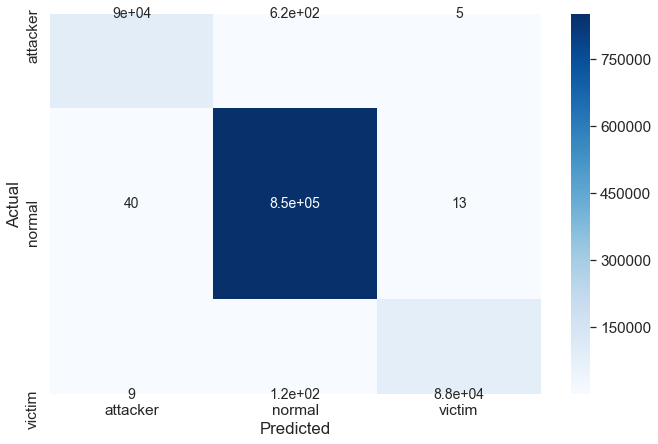

In [293]:
data = confusion_matrix(y_test, y_pred_trainedDT)
df_cm = pd.DataFrame(data, columns=np.unique(y_test), index = np.unique(y_test))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (11,7))
sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 14})# font size

plt.show()

Here we are saving some useful variables that we will use later:

In [294]:
accuracy_score_trainedDT = accuracy_score(y_test,y_pred_trainedDT)

classification_report_trainedDT = classification_report(y_test,y_pred_trainedDT,digits=5)

balanced_accuracy_score_trainedDT = balanced_accuracy_score(y_test,y_pred_trainedDT)

confusion_matrix_true_trainedDT = confusion_matrix(y_test, y_test)

confusion_matrix_pred_trainedDT = confusion_matrix(y_test,y_pred_trainedDT)

##### 9.1.4.2. RandomForest Classifier

Training the random forest searching for the best parameter:

In [295]:
start_time = time.time()

classifier = RandomForestClassifier()

pipe = Pipeline(steps=[('clf', classifier)])

param_grid = {
    'clf__n_estimators': [20,25,30,35,40,45,50],
}

searchRF = GridSearchCV(pipe, param_grid, iid=False, cv=3, verbose=True)
searchRF.fit(X_train, y_train)

print(searchRF.best_params_)

searchRF_best = searchRF.best_estimator_

trainedRF = searchRF_best.get_params()['clf']

elapsed_training_time_trainedRF = time.time() - start_time
print("Elapsed time %.2f seconds" % elapsed_training_time_trainedRF)

Fitting 3 folds for each of 7 candidates, totalling 21 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  21 out of  21 | elapsed:  6.0min finished


{'clf__n_estimators': 40}
Elapsed time 390.39 seconds


Creating the prediction:

In [296]:
start_time = time.time()

y_pred_trainedRF = trainedRF.predict(X_test)

elapsed_prediction_time_trainedRF = time.time() - start_time
print("Elapsed time %.2f seconds" % elapsed_prediction_time_trainedRF)

Elapsed time 4.66 seconds


In [297]:
#y_test

In [298]:
#y_pred_trainedRF

In [299]:
print("classification_report:", classification_report(y_test,y_pred_trainedRF)) 

classification_report:               precision    recall  f1-score   support

    attacker       1.00      0.99      1.00     91009
      normal       1.00      1.00      1.00    851802
      victim       1.00      1.00      1.00     88262

    accuracy                           1.00   1031073
   macro avg       1.00      1.00      1.00   1031073
weighted avg       1.00      1.00      1.00   1031073



In [300]:
print('confusion_matrix-train: \n',confusion_matrix(y_train, y_train))
print('confusion_matrix-test: \n',confusion_matrix(y_test, y_test))
print('confusion_matrix-pred_trainedRF vs test: \n',confusion_matrix(y_pred_trainedRF, y_test))

confusion_matrix-train: 
 [[ 75124      0      0]
 [     0 700513      0]
 [     0      0  69515]]
confusion_matrix-test: 
 [[ 91009      0      0]
 [     0 851802      0]
 [     0      0  88262]]
confusion_matrix-pred_trainedRF vs test: 
 [[ 90412     22     11]
 [   592 851777     88]
 [     5      3  88163]]


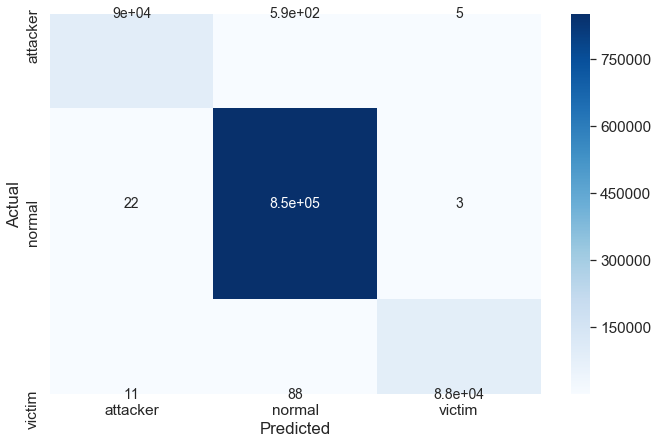

In [301]:
data = confusion_matrix(y_test, y_pred_trainedRF)
df_cm = pd.DataFrame(data, columns=np.unique(y_test), index = np.unique(y_test))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (11,7))
sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 14})# font size

plt.show()

Here we are saving some useful variables that we will use later:

In [302]:
accuracy_score_trainedRF = accuracy_score(y_test,y_pred_trainedRF)

classification_report_trainedRF = classification_report(y_test,y_pred_trainedRF,digits=5)

balanced_accuracy_score_trainedRF = balanced_accuracy_score(y_test,y_pred_trainedRF)

confusion_matrix_true_trainedRF = confusion_matrix(y_test, y_test)

confusion_matrix_pred_trainedRF = confusion_matrix(y_test,y_pred_trainedRF)

## 10. Neural network models (supervised) - Multi-layer Perceptron

The sklearn.neural_network module includes models based on neural networks.

- https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html

- https://scikit-learn.org/stable/modules/neural_networks_supervised.html#neural-networks-supervised

- https://scikit-learn.org/stable/modules/neural_networks_unsupervised.html#neural-networks-unsupervised

##### Neural Network (NN):
Originally attempts at modeling neurons in brain. Neurons modeled with simple step functions (*activation function*) that take in weighted input from previous neurons and if triggered, output to other neurons. Model of biological neuron called *perceptron* create different types of networks models by varying:

- topology of network
- activation function
- learning objective
- training method

NNs usually made up of neurons arranged in *layers*. Each layer receives input from previous layer and if activated, emits output to next layer.

<b>Parameters</b>: connection of two neurons has associated weight, neuron has associated *bias* (threshold)

The advantages of Multi-layer Perceptron are:
1. Capability to learn non-linear models.
2. Capability to learn models in real-time (on-line learning) using partial_fit.

The disadvantages of Multi-layer Perceptron (MLP) include:
1. MLP with hidden layers have a non-convex loss function where there exists more than one local minimum. Therefore different random weight initializations can lead to different validation accuracy.
2. MLP requires tuning a number of hyperparameters such as the number of hidden neurons, layers, and iterations.
3. MLP is sensitive to feature scaling.

The first thing we are going to do is to import the Multi-Layer Perceptron Classifier from sklearn.

In [303]:
from sklearn.neural_network import MLPClassifier

- https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html

With the next code we are going to define and train our Multi-Layer Perceptron Classifier.

In [304]:
t0 = time.time()

clf_MLP = MLPClassifier(hidden_layer_sizes=(200, ), activation='relu', solver='sgd',learning_rate='adaptive',verbose=True)

clf_MLP.fit(X_train, y_train)

elapsed_training_time_MLP = time.time() - t0

print("elapsed time = %.2f" % elapsed_training_time_MLP)

Iteration 1, loss = 0.11102786
Iteration 2, loss = 0.02167694
Iteration 3, loss = 0.01223769
Iteration 4, loss = 0.00900073
Iteration 5, loss = 0.00742675
Iteration 6, loss = 0.00649116
Iteration 7, loss = 0.00586263
Iteration 8, loss = 0.00540248
Iteration 9, loss = 0.00504730
Iteration 10, loss = 0.00476450
Iteration 11, loss = 0.00453211
Iteration 12, loss = 0.00433800
Iteration 13, loss = 0.00417669
Iteration 14, loss = 0.00403946
Iteration 15, loss = 0.00392343
Iteration 16, loss = 0.00382283
Iteration 17, loss = 0.00373473
Iteration 18, loss = 0.00365743
Iteration 19, loss = 0.00358833
Iteration 20, loss = 0.00352677
Iteration 21, loss = 0.00347104
Iteration 22, loss = 0.00342162
Iteration 23, loss = 0.00337657
Iteration 24, loss = 0.00333539
Iteration 25, loss = 0.00329897
Iteration 26, loss = 0.00326405
Iteration 27, loss = 0.00323301
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Setting learning rate to 0.000200
Iteration 28, loss = 0.00321277

Here we are going to perform some checks and calculation on the trained classifier:
1. List of classes

In [305]:
clf_MLP.classes_

array(['attacker', 'normal', 'victim'], dtype='<U8')

2. Current loss (computed with the loss function)

In [306]:
clf_MLP.loss_

0.003142857869880744

3. Number of layers

In [307]:
clf_MLP.n_layers_

3

4. Number of outputs

In [308]:
clf_MLP.n_outputs_

3

Then we are going to start our prediction on the test variable.

In [309]:
# start the time
t0 = time.time()

# perform the prediction
y_pred_MLP = clf_MLP.predict(X_test)

elapsed_prediction_time_MLP = time.time() - t0

print("elapsed time = %.2f" % elapsed_prediction_time_MLP)

elapsed time = 7.14


The accuracy of the classifier is really high (around 99.92%) also the other metrics are quite good

In [310]:
print("classification_report:", classification_report(y_test,y_pred_MLP)) 

classification_report:               precision    recall  f1-score   support

    attacker       1.00      1.00      1.00     91009
      normal       1.00      1.00      1.00    851802
      victim       1.00      1.00      1.00     88262

    accuracy                           1.00   1031073
   macro avg       1.00      1.00      1.00   1031073
weighted avg       1.00      1.00      1.00   1031073



Here we are showing the confusion matrix (with and without seaborn) to better understand the prediction results.

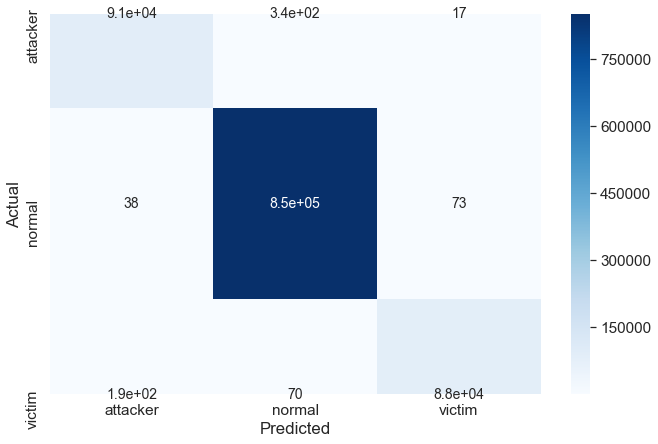

In [311]:
data = confusion_matrix(y_test,y_pred_MLP)
df_cm = pd.DataFrame(data, columns=np.unique(y_test), index = np.unique(y_test))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (11,7))
sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 14})# font size

plt.show()

In [312]:
print('confusion_matrix-pred_MLP vs test: \n',confusion_matrix(y_pred_MLP, y_test))

confusion_matrix-pred_MLP vs test: 
 [[ 90656     38    188]
 [   336 851691     70]
 [    17     73  88004]]


Here there are the usual checks:

In [313]:
print('confusion_matrix-train: \n',confusion_matrix(y_train, y_train))
print('confusion_matrix-test: \n',confusion_matrix(y_test, y_test))

confusion_matrix-train: 
 [[ 75124      0      0]
 [     0 700513      0]
 [     0      0  69515]]
confusion_matrix-test: 
 [[ 91009      0      0]
 [     0 851802      0]
 [     0      0  88262]]


Here we are saving some useful variables that we will use later:

In [314]:
accuracy_score_MLP = accuracy_score(y_test,y_pred_MLP)

classification_report_MLP = classification_report(y_test,y_pred_MLP,digits=5)

balanced_accuracy_score_MLP = balanced_accuracy_score(y_test,y_pred_MLP)

confusion_matrix_true_MLP = confusion_matrix(y_test, y_test)

confusion_matrix_pred_MLP = confusion_matrix(y_test,y_pred_MLP)

## 11.  Trying to predict attackType variable

In this paragraph we are going to test the same classifiers that we used before but this time we are going to use the "attackType" as a label and no longer "classes". So the first thing to do is to define the variables in order to keep the y as a label variable with "attackType" column.

In [315]:
# df_before_train.columns

In [316]:
X_train_type = df_before_train.drop(label_cols,axis=1)
X_test_type = df_before_test.drop(label_cols,axis=1)
y_train_type = df_before_train['attackType']
y_test_type = df_before_test['attackType']

Some checks:

In [317]:
set(y_train_type)

{'---', 'bruteForce', 'dos', 'pingScan', 'portScan'}

In [318]:
set(y_test_type)

{'---', 'bruteForce', 'dos', 'pingScan', 'portScan'}

Before starting to test the classifiers we are going to scale the variables using the StandardScaler, as we did before.

In [319]:
standard_scaler = StandardScaler().fit(X_train_type[numeric_cols])
# fit(self, X[, y]) --> Compute the mean and std to be used for later scaling.

X_train_type[numeric_cols] = standard_scaler.transform(X_train_type[numeric_cols])
X_test_type[numeric_cols] = standard_scaler.transform(X_test_type[numeric_cols])

### 11.1. DecisionTree

The following operation will be similar for all the classifiers. As first thing we are going to train our classifier.

In [320]:
start_time = time.time()

classifier = DecisionTreeClassifier()

pipe = Pipeline(steps=[('clf', classifier)])

param_grid = {
    'clf__max_leaf_nodes': [100,200,None],
    'clf__max_depth': [25, 35, 45],
}

searchDT_type = GridSearchCV(pipe, param_grid, iid=False, cv=3, verbose=True)
searchDT_type.fit(X_train_type, y_train_type)

print(searchDT_type.best_params_)

searchDT_type_best = searchDT_type.best_estimator_

trainedDT_type = searchDT_type_best.get_params()['clf']

elapsed_training_time_DT_type = time.time() - start_time
print("Elapsed time %.2f seconds" % elapsed_training_time_DT_type)

Fitting 3 folds for each of 9 candidates, totalling 27 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  27 out of  27 | elapsed:  3.1min finished


{'clf__max_depth': 45, 'clf__max_leaf_nodes': 100}
Elapsed time 197.63 seconds


Then we are creating our prediction:

In [321]:
start_time = time.time()

y_pred_trainedDT_type = trainedDT_type.predict(X_test_type)

elapsed_prediction_time_DT_type = time.time() - start_time
print("Elapsed time %.2f seconds" % elapsed_prediction_time_DT_type)

Elapsed time 0.72 seconds


Checking the classification report:

In [322]:
print("classification report: \n", classification_report(y_test_type,y_pred_trainedDT_type)) 

classification report: 
               precision    recall  f1-score   support

         ---       1.00      1.00      1.00    851802
  bruteForce       0.00      0.00      0.00       360
         dos       1.00      1.00      1.00    170512
    pingScan       0.61      0.37      0.46       257
    portScan       0.98      0.95      0.97      8142

    accuracy                           1.00   1031073
   macro avg       0.72      0.66      0.68   1031073
weighted avg       1.00      1.00      1.00   1031073



Confusion matrix with and without seaborn:

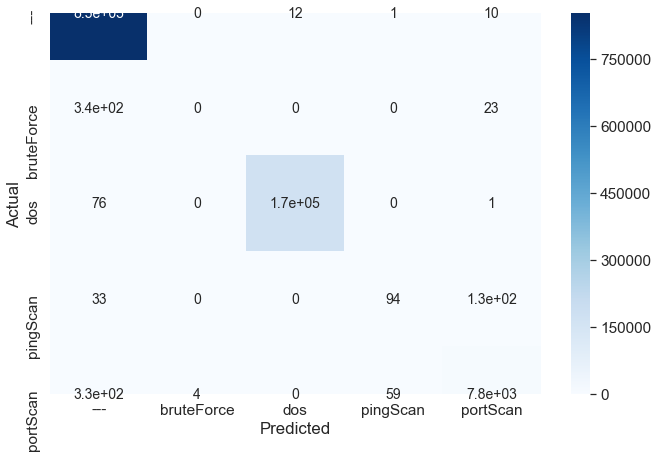

In [323]:
data = confusion_matrix(y_test_type,y_pred_trainedDT_type)
df_cm = pd.DataFrame(data, columns=np.unique(y_test_type), index = np.unique(y_test_type))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (11,7))
sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 14})# font size

plt.show()

In [324]:
print('confusion_matrix-pred_trainedDT_type vs test_type: \n',confusion_matrix(y_pred_trainedDT_type, y_test_type))

confusion_matrix-pred_trainedDT_type vs test_type: 
 [[851779    337     76     33    328]
 [     0      0      0      0      4]
 [    12      0 170435      0      0]
 [     1      0      0     94     59]
 [    10     23      1    130   7751]]


Some checks:

In [325]:
print('confusion_matrix-train_type: \n',confusion_matrix(y_train_type, y_train_type))
print('confusion_matrix-test_type: \n',confusion_matrix(y_test_type, y_test_type))


confusion_matrix-train_type: 
 [[700513      0      0      0      0]
 [     0    168      0      0      0]
 [     0      0 125430      0      0]
 [     0      0      0    355      0]
 [     0      0      0      0  18686]]
confusion_matrix-test_type: 
 [[851802      0      0      0      0]
 [     0    360      0      0      0]
 [     0      0 170512      0      0]
 [     0      0      0    257      0]
 [     0      0      0      0   8142]]


Here we are saving some useful variables that we will use later:

In [326]:
accuracy_score_DT_type = accuracy_score(y_test_type,y_pred_trainedDT_type)

classification_report_DT_type = classification_report(y_test_type,y_pred_trainedDT_type,digits=5)

balanced_accuracy_score_DT_type = balanced_accuracy_score(y_test_type,y_pred_trainedDT_type)

confusion_matrix_true_DT_type = confusion_matrix(y_test_type, y_test_type)

confusion_matrix_pred_DT_type = confusion_matrix(y_test_type,y_pred_trainedDT_type)

### 11.2. RandomForest 

For random forest we are going to follow the same procedure of the one followed with Decision Tree. First we train, with .fit() the classifier.

In [327]:
start_time = time.time()

classifier = RandomForestClassifier()

pipe = Pipeline(steps=[('clf', classifier)])

param_grid = {
    'clf__max_leaf_nodes': [100,200,None],
    'clf__max_depth': [25, 35, 45],
}

searchRF_type = GridSearchCV(pipe, param_grid, iid=False, cv=3, verbose=True)
searchRF_type.fit(X_train_type, y_train_type)

print(searchDT_type.best_params_)

searchRF_type_best = searchRF_type.best_estimator_

trainedRF_type = searchRF_type_best.get_params()['clf']

elapsed_training_time_RF_type = time.time() - start_time
print("Elapsed time %.2f seconds" % elapsed_training_time_RF_type)

Fitting 3 folds for each of 9 candidates, totalling 27 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\Utente\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Utente\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Utente\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Utente\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", Future

{'clf__max_depth': 45, 'clf__max_leaf_nodes': 100}
Elapsed time 174.13 seconds


Then we create the prediction:

In [328]:
start_time = time.time()

y_pred_trainedRF_type = trainedRF_type.predict(X_test_type)

elapsed_prediction_time_RF_type = time.time() - start_time
print("Elapsed time %.2f seconds" % elapsed_prediction_time_RF_type)

Elapsed time 1.80 seconds


Classification report:

In [329]:
print("classification_report: \n", classification_report(y_test_type,y_pred_trainedRF_type)) 

classification_report: 
               precision    recall  f1-score   support

         ---       1.00      1.00      1.00    851802
  bruteForce       0.42      0.04      0.07       360
         dos       1.00      1.00      1.00    170512
    pingScan       0.54      0.50      0.52       257
    portScan       0.98      0.95      0.97      8142

    accuracy                           1.00   1031073
   macro avg       0.79      0.70      0.71   1031073
weighted avg       1.00      1.00      1.00   1031073



Confusion matrix with and without seaborn.

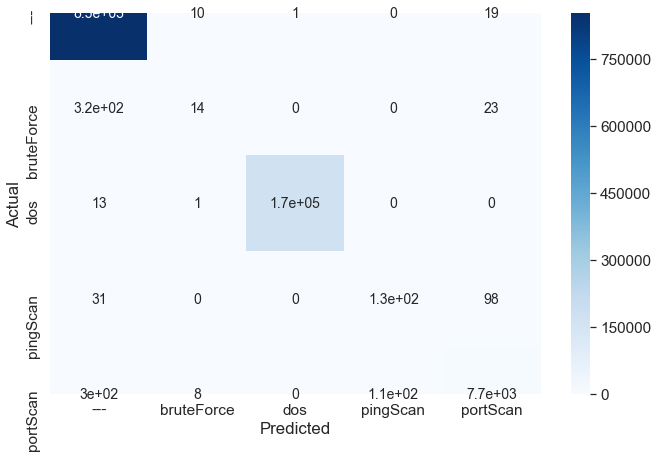

In [330]:
data = confusion_matrix(y_test_type,y_pred_trainedRF_type)
df_cm = pd.DataFrame(data, columns=np.unique(y_test_type), index = np.unique(y_test_type))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (11,7))
sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 14})# font size

plt.show()

In [331]:
print('confusion_matrix-pred_trainedRF_type vs test_type: \n',confusion_matrix(y_pred_trainedRF_type, y_test_type))

confusion_matrix-pred_trainedRF_type vs test_type: 
 [[851772    323     13     31    300]
 [    10     14      1      0      8]
 [     1      0 170498      0      0]
 [     0      0      0    128    111]
 [    19     23      0     98   7723]]


Some checks:

In [332]:
print('confusion_matrix-train_type: \n',confusion_matrix(y_train_type, y_train_type))
print('confusion_matrix-test_type: \n',confusion_matrix(y_test_type, y_test_type))

confusion_matrix-train_type: 
 [[700513      0      0      0      0]
 [     0    168      0      0      0]
 [     0      0 125430      0      0]
 [     0      0      0    355      0]
 [     0      0      0      0  18686]]
confusion_matrix-test_type: 
 [[851802      0      0      0      0]
 [     0    360      0      0      0]
 [     0      0 170512      0      0]
 [     0      0      0    257      0]
 [     0      0      0      0   8142]]


Here we are saving some useful variables that we will use later:

In [333]:
accuracy_score_RF_type = accuracy_score(y_test_type,y_pred_trainedRF_type)

classification_report_RF_type = classification_report(y_test_type,y_pred_trainedRF_type,digits=5)

balanced_accuracy_score_RF_type = balanced_accuracy_score(y_test_type,y_pred_trainedRF_type)

confusion_matrix_true_RF_type = confusion_matrix(y_test_type, y_test_type)

confusion_matrix_pred_RF_type = confusion_matrix(y_test_type,y_pred_trainedRF_type)

### 11.3. Multi-layer Perceptron

Defining and training the classifier:

In [334]:
t0 = time.time()

clf_MLP_type = MLPClassifier(hidden_layer_sizes=(200, ), activation='relu', solver='sgd',learning_rate='adaptive',verbose=True)

clf_MLP_type.fit(X_train_type, y_train_type)

elapsed_training_time_MLP_type = time.time() - t0

print("elapsed time = %.2f" % elapsed_training_time_MLP_type)

Iteration 1, loss = 0.10778394
Iteration 2, loss = 0.02444608
Iteration 3, loss = 0.01494563
Iteration 4, loss = 0.01141938
Iteration 5, loss = 0.00959834
Iteration 6, loss = 0.00846942
Iteration 7, loss = 0.00768904
Iteration 8, loss = 0.00710829
Iteration 9, loss = 0.00665571
Iteration 10, loss = 0.00629021
Iteration 11, loss = 0.00598891
Iteration 12, loss = 0.00573537
Iteration 13, loss = 0.00551995
Iteration 14, loss = 0.00533378
Iteration 15, loss = 0.00517030
Iteration 16, loss = 0.00502647
Iteration 17, loss = 0.00489818
Iteration 18, loss = 0.00478396
Iteration 19, loss = 0.00468230
Iteration 20, loss = 0.00459083
Iteration 21, loss = 0.00450716
Iteration 22, loss = 0.00443110
Iteration 23, loss = 0.00436044
Iteration 24, loss = 0.00429588
Iteration 25, loss = 0.00423637
Iteration 26, loss = 0.00418088
Iteration 27, loss = 0.00412675
Iteration 28, loss = 0.00408092
Iteration 29, loss = 0.00403487
Iteration 30, loss = 0.00399197
Training loss did not improve more than tol=0.000

Some operations and checks:
1. List of classes

In [335]:
clf_MLP_type.classes_

array(['---', 'bruteForce', 'dos', 'pingScan', 'portScan'], dtype='<U10')

2. Current loss (using .loss function)

In [336]:
clf_MLP_type.loss_

0.0038663898221839113

3. Number of layers

In [337]:
clf_MLP_type.n_layers_

3

4. Number of outputs

In [338]:
clf_MLP_type.n_outputs_

5

5. Output activation

In [339]:
clf_MLP_type.out_activation_

'softmax'

Creating the prediction:

In [340]:
t0 = time.time()

y_pred_MLP_type = clf_MLP_type.predict(X_test_type)

elapsed_prediction_time_MLP_type = time.time() - t0

print("elapsed time = %.2f" % elapsed_prediction_time_MLP_type)

elapsed time = 7.05


Classification report:

In [341]:
print("classification_report: \n", classification_report(y_test_type,y_pred_MLP_type)) 

C:\Users\Utente\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


classification_report: 
               precision    recall  f1-score   support

         ---       1.00      1.00      1.00    851802
  bruteForce       0.00      0.00      0.00       360
         dos       1.00      1.00      1.00    170512
    pingScan       1.00      0.01      0.02       257
    portScan       0.93      0.96      0.94      8142

    accuracy                           1.00   1031073
   macro avg       0.79      0.59      0.59   1031073
weighted avg       1.00      1.00      1.00   1031073



Confusion matrix with and without seaborn

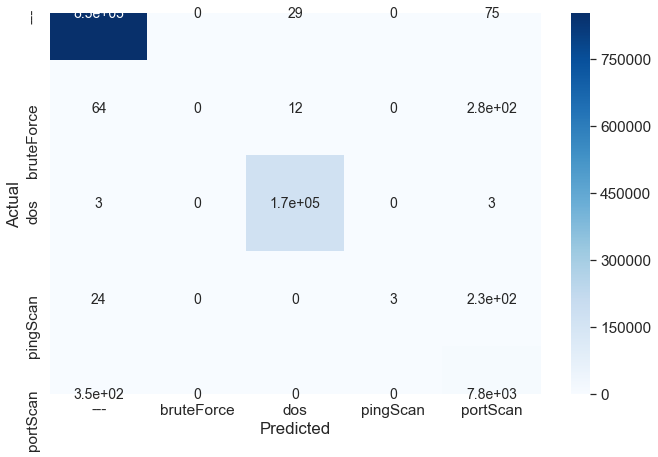

In [342]:
data = confusion_matrix(y_test_type,y_pred_MLP_type)
df_cm = pd.DataFrame(data, columns=np.unique(y_test_type), index = np.unique(y_test_type))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (11,7))
sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 14})# font size

plt.show()

In [343]:
print('confusion_matrix-pred_MLP_type vs test_type: \n',confusion_matrix(y_pred_MLP_type, y_test_type))

confusion_matrix-pred_MLP_type vs test_type: 
 [[851698     64      3     24    348]
 [     0      0      0      0      0]
 [    29     12 170506      0      0]
 [     0      0      0      3      0]
 [    75    284      3    230   7794]]


Some checks:

In [344]:
print('confusion_matrix-train_type: \n',confusion_matrix(y_train_type, y_train_type))
print('confusion_matrix-test_type: \n',confusion_matrix(y_test_type, y_test_type))

confusion_matrix-train_type: 
 [[700513      0      0      0      0]
 [     0    168      0      0      0]
 [     0      0 125430      0      0]
 [     0      0      0    355      0]
 [     0      0      0      0  18686]]
confusion_matrix-test_type: 
 [[851802      0      0      0      0]
 [     0    360      0      0      0]
 [     0      0 170512      0      0]
 [     0      0      0    257      0]
 [     0      0      0      0   8142]]


Here we are saving some useful variables that we will use later:

In [345]:
accuracy_score_MLP_type = accuracy_score(y_test_type,y_pred_MLP_type)

classification_report_MLP_type = classification_report(y_test_type,y_pred_MLP_type,digits=5)

balanced_accuracy_score_MLP_type = balanced_accuracy_score(y_test_type,y_pred_MLP_type)

confusion_matrix_true_MLP_type = confusion_matrix(y_test_type, y_test_type)

confusion_matrix_pred_MLP_type = confusion_matrix(y_test_type,y_pred_MLP_type)

## 12. Classifier Recap

In this chapter we are going to list some important statistics from all the different classifiers we have tested, in order to compare them.

## 12.1 Regular Classifiers

In [346]:
print('We trained some classifiers with the same input data and now we want to evaluate them looking to their performances')
print('This section is focused on classifiers performance prediction on -class- label')
print('for this part we do not perform cross-validation')
print('\n12.1 REGULAR CLASSIFIERS\n')

print('\n---------------------------------------------------------------------------------------------------------------------------\n')

print('LOGISTIC REGRESSION:\n')

print('LogisticRegressionClassifier interesting metrics:\n')

print('elapsed time for training:',elapsed_training_time_lr,'\n')
print('elapsed time to make predictions:', elapsed_prediction_time_lr,'\n')

print('classification_report: \n', classification_report_lr,'\n')
print('balanced_accuracy_score:', balanced_accuracy_score_lr,'\n')

print('confusion_matrix-true value: \n',confusion_matrix_true_lr,'\n')
print('confusion_matrix-pred vs test: \n',confusion_matrix_pred_lr)

print('\n---------------------------------------------------------------------------------------------------------------------------\n')

print('GAUSSIAN NAIVE BAYES:\n')

print('GaussianNBClassifier interesting metrics:\n')

print('elapsed time for training:',elapsed_training_time_nb,'\n')
print('elapsed time to make predictions:', elapsed_prediction_time_nb,'\n')

print('classification_report: \n', classification_report_nb,'\n')
print('balanced_accuracy_score:', balanced_accuracy_score_nb,'\n')

print('confusion_matrix-true value: \n',confusion_matrix_true_nb,'\n')
print('confusion_matrix-pred vs test: \n',confusion_matrix_pred_nb)

print('\n---------------------------------------------------------------------------------------------------------------------------\n')

print('DECISION TREE:\n')

print('DecisionTreeClassifier interesting metrics:\n')

print('elapsed time for training:',elapsed_training_time_DT,'\n')
print('elapsed time to make predictions:', elapsed_prediction_time_DT,'\n')

print('classification_report: \n', classification_report_DT,'\n')
print('balanced_accuracy_score:', balanced_accuracy_score_DT,'\n')

print('confusion_matrix-true value: \n',confusion_matrix_true_DT,'\n')
print('confusion_matrix-pred vs test: \n',confusion_matrix_pred_DT,'\n')

print('DecisionTreeClassifier interesting metrics after dropping zero importance columns:\n')

print('elapsed time for training:',elapsed_training_time_DTDropped,'\n')
print('elapsed time to make predictions:', elapsed_prediction_time_DTDropped,'\n')

print('classification_report: \n', classification_report_DTD,'\n')
print('balanced_accuracy_score:', balanced_accuracy_score_DTD,'\n')

print('confusion_matrix-true value: \n',confusion_matrix_true_DTD,'\n')
print('confusion_matrix-pred vs test: \n',confusion_matrix_pred_DTD)

print('\n---------------------------------------------------------------------------------------------------------------------------\n')

print('RANDOM FOREST CLASSIFIER:\n')

print('RandomForestClassifier interesting metrics:\n')

print('elapsed time for training:',elapsed_training_time_RF,'\n')
print('elapsed time to make predictions:', elapsed_prediction_time_RF,'\n')

print('classification_report: \n', classification_report_RF,'\n')
print('balanced_accuracy_score:', balanced_accuracy_score_RF,'\n')

print('confusion_matrix-true value: \n',confusion_matrix_true_RF,'\n')
print('confusion_matrix-pred vs test: \n',confusion_matrix_pred_RF,'\n')

print('\n---------------------------------------------------------------------------------------------------------------------------\n')


We trained some classifiers with the same input data and now we want to evaluate them looking to their performances
This section is focused on classifiers performance prediction on -class- label
for this part we do not perform cross-validation

12.1 REGULAR CLASSIFIERS


---------------------------------------------------------------------------------------------------------------------------

LOGISTIC REGRESSION:

LogisticRegressionClassifier interesting metrics:

elapsed time for training: 27.766695737838745 

elapsed time to make predictions: 0.8008575439453125 

classification_report: 
               precision    recall  f1-score   support

    attacker    0.99072   0.83722   0.90753     91009
      normal    0.97456   0.99872   0.98649    851802
      victim    0.99242   0.91353   0.95134     88262

    accuracy                        0.97717   1031073
   macro avg    0.98590   0.91649   0.94845   1031073
weighted avg    0.97751   0.97717   0.97651   1031073
 

balanced_accuracy_s

### 12.2. Classifiers with Binary Labels (searching for best parameters)

In [347]:
print('We trained some classifiers with the same input data and now we want to evaluate them looking to their performances')
print('This section is focused on classifiers performance prediction on -class- binary label')
print('we decided to transform -class- label into a binary one, so we merged attacker and victim into 1 and normal connections into 0')
print('in this part we also performed cross-validation')
print('\n12.2 CLASSIFIERS WITH BINARY LABELS\n')

print('\n---------------------------------------------------------------------------------------------------------------------------\n')

print('RANDOM FOREST CLASSIFIER:\n')
print('using binary label and cross-validation\n')
print('RandomForestClassifier interesting metrics:\n')

print('the best estimator is:',searchRF_bin_best,'\n')

print('elapsed time for training:',elapsed_training_time_trainedRF_bin,'\n')
print('elapsed time to make predictions:', elapsed_prediction_time_trainedRF_bin,'\n')

print('classification_report: \n', classification_report_RF_bin,'\n')
print('balanced_accuracy_score:', balanced_accuracy_score_RF_bin,'\n')

print('confusion_matrix-true value: \n',confusion_matrix_true_RF_bin,'\n')
print('confusion_matrix-pred value: \n',confusion_matrix_pred_RF_bin)

print('\n---------------------------------------------------------------------------------------------------------------------------\n')

print('DECISION TREE:\n')
print('using binary label and cross-validation\n')
print('DecisionTreeClassifier interesting metrics:\n')

print('elapsed time for training:',elapsed_training_time_trainedDT_bin,'\n')
print('elapsed time to make predictions:', elapsed_prediction_time_trainedDT_bin,'\n')

print('the best estimator is:',searchDT_bin_best,'\n')

print('classification_report: \n', classification_report_DT_bin,'\n')
print('balanced_accuracy_score:', balanced_accuracy_score_DT_bin,'\n')

print('confusion_matrix-true value: \n',confusion_matrix_true_DT_bin,'\n')
print('confusion_matrix-pred value: \n',confusion_matrix_pred_DT_bin)

print('\n---------------------------------------------------------------------------------------------------------------------------\n')

print('GAUSSIAN NAIVE BAYES:\n')
print('using binary label\n')
print('GaussianNBClassifier interesting metrics:\n')

print('elapsed time for training:',elapsed_training_time_NB_bin,'\n')
print('elapsed time to make predictions:', elapsed_prediction_time_NB_bin,'\n')

print('classification_report: \n', classification_report_NB_bin,'\n')
print('balanced_accuracy_score:', balanced_accuracy_score_NB_bin,'\n')

print('confusion_matrix-true value: \n',confusion_matrix_true_NB_bin,'\n')
print('confusion_matrix-pred value: \n',confusion_matrix_pred_NB_bin)

print('\n---------------------------------------------------------------------------------------------------------------------------\n')



We trained some classifiers with the same input data and now we want to evaluate them looking to their performances
This section is focused on classifiers performance prediction on -class- binary label
we decided to transform -class- label into a binary one, so we merged attacker and victim into 1 and normal connections into 0
in this part we also performed cross-validation

12.2 CLASSIFIERS WITH BINARY LABELS


---------------------------------------------------------------------------------------------------------------------------

RANDOM FOREST CLASSIFIER:

using binary label and cross-validation

RandomForestClassifier interesting metrics:

the best estimator is: Pipeline(memory=None,
         steps=[('clf',
                 RandomForestClassifier(bootstrap=True, class_weight=None,
                                        criterion='gini', max_depth=None,
                                        max_features='auto',
                                        max_leaf_nodes=None,
      

### 12.3. Best performing classifiers 

In [348]:
print('We trained some classifiers with the same input data and now we want to evaluate them looking to their performances')
print('This section is focused on classifiers performance prediction on -class- label')
print('we decided to perform cross-validation again on DT and RF, then we defined also MLP.')
print('in our opinion these are the best performing classifiers for our data.')
print('we use normal -class- label')
print('\n12.3 BEST PERFORMING CLASSIFIERS\n')

print('\n---------------------------------------------------------------------------------------------------------------------------\n')

print('DECISION TREE:\n')
print('using non-binary label and cross-validation\n')
print('DecisionTreeClassifier interesting metrics:\n')

print('elapsed time for training:',elapsed_training_time_trainedDT,'\n')
print('elapsed time to make predictions:', elapsed_prediction_time_trainedDT,'\n')

print('the best estimator is:',searchDT_best,'\n')

print('classification_report: \n', classification_report_trainedDT,'\n')
print('balanced_accuracy_score:', balanced_accuracy_score_trainedDT,'\n')

print('confusion_matrix-true value: \n',confusion_matrix_true_trainedDT,'\n')
print('confusion_matrix-pred value: \n',confusion_matrix_pred_trainedDT)

print('\n---------------------------------------------------------------------------------------------------------------------------\n')

print('RANDOM FOREST CLASSIFIER:\n')
print('using non-binary label and cross-validation\n')
print('RandomForestClassifier interesting metrics:\n')

print('the best estimator is:',searchRF_best,'\n')

print('elapsed time for training:',elapsed_training_time_trainedRF,'\n')
print('elapsed time to make predictions:', elapsed_prediction_time_trainedRF,'\n')

print('classification_report: \n', classification_report_trainedRF,'\n')
print('balanced_accuracy_score:', balanced_accuracy_score_trainedRF,'\n')

print('confusion_matrix-true value: \n',confusion_matrix_true_trainedRF,'\n')
print('confusion_matrix-pred value: \n',confusion_matrix_pred_trainedRF)

print('\n---------------------------------------------------------------------------------------------------------------------------\n')

print('MULTI-LAYER PERCEPTRON CLASSIFIER:\n')
print('using non-binary label\n')
print('Multi-layerPerceptronClassifier interesting metrics:\n')

print('elapsed time for training:',elapsed_training_time_MLP,'\n')
print('elapsed time to make predictions:', elapsed_prediction_time_MLP,'\n')

print('classification_report: \n', classification_report_MLP,'\n')
print('balanced_accuracy_score:', balanced_accuracy_score_MLP,'\n')

print('confusion_matrix-true value: \n',confusion_matrix_true_MLP,'\n')
print('confusion_matrix-pred value: \n',confusion_matrix_pred_MLP,'\n')

print('\n---------------------------------------------------------------------------------------------------------------------------\n')



We trained some classifiers with the same input data and now we want to evaluate them looking to their performances
This section is focused on classifiers performance prediction on -class- label
we decided to perform cross-validation again on DT and RF, then we defined also MLP.
in our opinion these are the best performing classifiers for our data.
we use normal -class- label

12.3 BEST PERFORMING CLASSIFIERS


---------------------------------------------------------------------------------------------------------------------------

DECISION TREE:

using non-binary label and cross-validation

DecisionTreeClassifier interesting metrics:

elapsed time for training: 191.09083580970764 

elapsed time to make predictions: 0.6801807880401611 

the best estimator is: Pipeline(memory=None,
         steps=[('clf',
                 DecisionTreeClassifier(class_weight=None, criterion='gini',
                                        max_depth=35, max_features=None,
                                

To conclude we can state that the best performances,in term of accuracy scores, are given by the Gaussian NB classifier, when the labels are transformed into binary variables, where 0 stands for normal and 1 stands for malicious (both attacker and victim). Although the accuracy score can lead to oversimplification and cannot be considered as the only metric in order to evaluate an algorithm. So, we also utilized the confusion matrix that shows that with over than one million connections the errors were only about 700. This is actually a very good score for a classifier. Another useful metric that we used to evaluate different algorithms is the "Balanced Accuracy Score". It is the accuracy of each class weighted for the number of connections (support) related to that class. In fact, this helps to adjust the problems related to the normal accuracy while having an high numerical difference between classes. The accuracy of our classifiers, even if they predicted all connections as "normal" ones would be high anyway because the normal connections are the 82% of the dataframe.

Another consideration that we can do is that generally the classifiers are performing better using Binary Labels normalized instead of normal labels because it increases the number of values (support) of each class. The pooling of attacker and victim in a single class is based on the assumption, developed while performing the data analysis, that the victim connections have more similarities with attacker connections than with normal ones. Another assumption behind this choice is that if our purpose is to block malicious connections in general, then blocking the connection of a victim of the attack would be the right choice.

This is the leaderboard of the best classifiers based on "Balanced Accuracy Score":
1. GaussianNB with Binary Labels*
2. RandomForest with Binary Labels and normalization
3. DecisionTree with Binary Labels and normalization
4. Multi-Layer Perceptron with normalization
5. RandomForest

<b> *NB. With GaussianNB it is not specified if there has been normalization because we have used that technique every time we utilized that classifier. </b>

### 12.4. Classifiers predicting attackType 

In [349]:
print('We trained some classifiers with the same input data and now we want to evaluate them looking to their performances')
print('This section is focused on classifiers performance prediction on -attackType- label')
print('we decided to perform cross-validation again on DT and RF, then we defined also MLP.')
print('in our opinion these are the best performing classifiers for our data.')
print('we use normal -class- label')
print('\n12.4 CLASSIFIERS PREDICTING -attackType-\n')

print('\n---------------------------------------------------------------------------------------------------------------------------\n')

print('DECISION TREE:\n')
print('using -attackType- label and cross-validation\n')
print('DecisionTreeClassifier interesting metrics:\n')

print('elapsed time for training:',elapsed_training_time_DT_type,'\n')
print('elapsed time to make predictions:', elapsed_prediction_time_DT_type,'\n')

print('the best estimator is:',searchDT_type_best,'\n')

print('classification_report: \n', classification_report_DT_type,'\n')
print('balanced_accuracy_score:', balanced_accuracy_score_DT_type,'\n')

print('confusion_matrix-true value: \n',confusion_matrix_true_DT_type,'\n')
print('confusion_matrix-pred value: \n',confusion_matrix_pred_DT_type)

print('\n---------------------------------------------------------------------------------------------------------------------------\n')

print('RANDOM FOREST CLASSIFIER:\n')
print('using -attackType- label and cross-validation\n')
print('RandomForestClassifier interesting metrics:\n')

print('the best estimator is:',searchRF_type_best,'\n')

print('elapsed time for training:',elapsed_training_time_RF_type,'\n')
print('elapsed time to make predictions:', elapsed_prediction_time_RF_type,'\n')

print('classification_report: \n', classification_report_RF_type,'\n')
print('balanced_accuracy_score:', balanced_accuracy_score_RF_type,'\n')

print('confusion_matrix-true value: \n',confusion_matrix_true_RF_type,'\n')
print('confusion_matrix-pred value: \n',confusion_matrix_pred_RF_type)

print('\n---------------------------------------------------------------------------------------------------------------------------\n')

print('MULTI-LAYER PERCEPTRON CLASSIFIER:\n')
print('using -attackType- label\n')
print('Multi-layerPerceptronClassifier interesting metrics:\n')

print('elapsed time for training:',elapsed_training_time_MLP_type,'\n')
print('elapsed time to make predictions:', elapsed_prediction_time_MLP_type,'\n')

print('classification_report: \n', classification_report_MLP_type,'\n')
print('balanced_accuracy_score:', balanced_accuracy_score_MLP_type,'\n')

print('confusion_matrix-true value: \n',confusion_matrix_true_MLP_type,'\n')
print('confusion_matrix-pred value: \n',confusion_matrix_pred_MLP_type,'\n')

print('\n---------------------------------------------------------------------------------------------------------------------------\n')


We trained some classifiers with the same input data and now we want to evaluate them looking to their performances
This section is focused on classifiers performance prediction on -attackType- label
we decided to perform cross-validation again on DT and RF, then we defined also MLP.
in our opinion these are the best performing classifiers for our data.
we use normal -class- label

12.4 CLASSIFIERS PREDICTING -attackType-


---------------------------------------------------------------------------------------------------------------------------

DECISION TREE:

using -attackType- label and cross-validation

DecisionTreeClassifier interesting metrics:

elapsed time for training: 197.62901306152344 

elapsed time to make predictions: 0.7170794010162354 

the best estimator is: Pipeline(memory=None,
         steps=[('clf',
                 DecisionTreeClassifier(class_weight=None, criterion='gini',
                                        max_depth=45, max_features=None,
                 

With the prediction of attackType class we can state that the best classifier, based on Balanced Accuracy Score is the RandomForest with a score of around 0.67382. However, there is an important consideration to do. In fact, the Balanced Accuracy Score of this classifiers is sensitively lower than the ones of classifiers predicting class label. This is due to the fact that there are some typologies of attacks, such as PingScan and BruteForce, that have a number of samples so low that the algorithm is not able to predict them. The support for those variables is not sufficiently big and this leads to wrong predictions for that class. This reflects on the overall performances of the classifier.

The leaderbord based on the "Balanced Accuracy Score" of the classifier is:
1. RandomForest
2. DecisionTree
3. Multi-Layer Perceptron

###### @falble

###### @gussr

###### @FiloLafro